In [154]:
# Start by importing the needed packages into my notebook
# Import Data analysis packages
import numpy as np
import pandas as pd
# Import the stats librayr from numpy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
#char_studio pushes your charts to the cloud 
#import chart_studio.plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
#allows us to create the Data and Figure objects
from plotly.graph_objs import *

In [156]:
from sklearn.utils import shuffle
#lets us see the charts in an iPython Notebook
pyo.offline.init_notebook_mode() # run at the start of every ipython

In [157]:
#Importing Maize Dataframe
Rice_df=pd.read_csv("Rice_df.csv")
Rice_df.head()

Unnamed: 0       combined_id   Unique_id  Segment_id Province_name  \
0         733  12111243Season A  12111243.0    121112.0        Kigali   
1         961    120019Season A    120019.0     12001.0        Kigali   
2         962   1200110Season A   1200110.0     12001.0        Kigali   
3         965    120071Season A    120071.0     12007.0         South   
4        1261    120071Season B    120071.0     12007.0        Kigali   

  District_name  Plot_number  Plot_Area_sqm Cropping_system  Number_of_crops  \
0        GASABO         43.0   5.024227e+02            Pure              1.0   
1        GASABO          9.0   2.443044e+04            Pure              1.0   
2        GASABO         10.0   2.071633e+04            Pure              1.0   
3        GASABO          1.0   2.125225e+06            Pure              1.0   
4        GASABO          1.0   1.648676e+06            Pure              1.0   

   ... Precipitation_season_new  Humidity_new Coeff_Square_meter  \
0  ...                    170.0     57.000000           0.398071   
1  ...                    170.0     57.000000           0.060580   
2  ...                    170.0     57.000000           0.399685   
3  ...                    170.0     57.000000           0.410323   
4  ...                    155.3     61.097778           0.424583   

  Coeff_Seeds_meter Coeff_fert_meter Coeff_inorganic_meter  Coeff_harvested  \
0          0.007961              0.0              0.000000      3980.711758   
1          0.000491              0.0              0.000000       605.801746   
2          0.002993              0.0              0.000000      3996.847198   
3          0.005004              0.0              0.000000      4103.230998   
4          0.004852              0.0              0.010736      4245.831214   

  Coeff_seed  Coeff_fertiliser  Coeff_inorganic_fertiliser  
0  79.614235               0.0                    0.000000  
1   4.911906               0.0                    0.000000  
2  29.928083               0.0                    0.000000  
3  50.039402               0.0                    0.000000  
4  48.523785               0.0                  107.358875  

[5 rows x 53 columns]

In [158]:
Rice_df.shape

(2602, 53)

In [159]:
Rice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2602 entries, 0 to 2601
Data columns (total 53 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2602 non-null   int64  
 1   combined_id                       2602 non-null   object 
 2   Unique_id                         2602 non-null   float64
 3   Segment_id                        2602 non-null   float64
 4   Province_name                     2602 non-null   object 
 5   District_name                     2602 non-null   object 
 6   Plot_number                       2602 non-null   float64
 7   Plot_Area_sqm                     2353 non-null   float64
 8   Cropping_system                   2602 non-null   object 
 9   Number_of_crops                   2602 non-null   float64
 10  Crop_name                         2602 non-null   object 
 11  Crop_Area_sqm                     2602 non-null   float64
 12  Type_s

In [160]:
Rice_df.isnull().sum()

Unnamed: 0                            0
combined_id                           0
Unique_id                             0
Segment_id                            0
Province_name                         0
District_name                         0
Plot_number                           0
Plot_Area_sqm                       249
Cropping_system                       0
Number_of_crops                       0
Crop_name                             0
Crop_Area_sqm                         0
Type_seeds_sown                       0
Season                                0
Season1                               0
CropGroup                             0
Crop_Area_ha                          0
Agri_year                             0
Qtity_seeds_sown                      0
Total_qtity_harvested                 0
Usage_organic_fertilizer              0
Qtity_organic_fertiliser              0
Usage_inorganic_fertilizer            0
inOrganic_fertiliser_type           236
inorganic_fertiliser_unity          236


In [161]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [162]:
Rice_df['Crop_name'].value_counts()

Paddy rice    2602
Name: Crop_name, dtype: int64

In [163]:
rice_data=Rice_df.values

In [164]:
Qtity_seeds_sown=[]
for rice in rice_data:
    i=rice[-3]
    if i>=1000:
        Qtity_seeds_sown.append(55) 
    elif (i>=500)&(i<1000):
        Qtity_seeds_sown.append(52)
    elif (i>=100)&(i<500):
        Qtity_seeds_sown.append(51)
    elif (i>=50)&(i<100):
        Qtity_seeds_sown.append(50)
    elif (i>=20)&(i<25):
        Qtity_seeds_sown.append(25)
    elif (i>=15)&(i<20):
        Qtity_seeds_sown.append(23)
    elif (i>=10)&(i<15):
        Qtity_seeds_sown.append(22)
    elif (i>=1)&(i<10):
        Qtity_seeds_sown.append(21)
    elif (i<1):
        Qtity_seeds_sown.append(20)
    else:
        Qtity_seeds_sown.append(i)

In [165]:
Rice_df['Total_qtity_seeds_sown']=Qtity_seeds_sown

In [166]:
Rice_df['Real_qtity_seeds_sown']=(Rice_df['Total_qtity_seeds_sown']*Rice_df['crop_area_sq'])/10000

In [167]:
Rice_df[['Real_qtity_seeds_sown','Crop_Area_ha']].head()

Real_qtity_seeds_sown  Crop_Area_ha
0               2.512114      0.050242
1              51.303913      2.443043
2              62.000000      2.071633
3           10626.126099    212.522522
4            8000.000000    164.867599

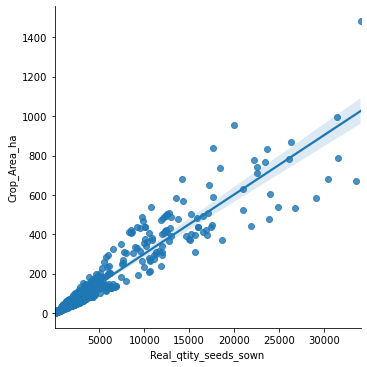

In [168]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Crop_Area_ha',data=Rice_df)

C:\Users\Jean Damascene\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Real_qtity_seeds_sown', ylabel='Density'>

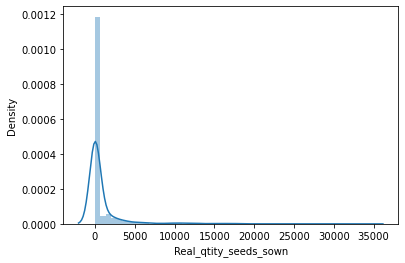

In [169]:
sns.distplot(Rice_df['Real_qtity_seeds_sown'])

In [170]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [171]:
Qtity_Harvested=[]
for qtity in rice_data:
    i=qtity[-6]
    if i>=8000:
        Qtity_Harvested.append(6500) 
    elif (i>=7500)&(i<8000):
        Qtity_Harvested.append(6300)
    elif (i>=7000)&(i<7500):
        Qtity_Harvested.append(6200)
    elif (i>=6500)&(i<7000):
        Qtity_Harvested.append(6100)
    elif (i>=6000)&(i<6500):
        Qtity_Harvested.append(6000)
    elif (i>=1500)&(i<2001):
        Qtity_Harvested.append(2000)
    elif (i>=1000)&(i<1500):
        Qtity_Harvested.append(1900)
    elif (i>=500)&(i<1000):
        Qtity_Harvested.append(1850)
    elif (i<500):
        Qtity_Harvested.append(1800)
    else:
        Qtity_Harvested.append(i)

In [172]:
Rice_df['Total_qtity_harvested']=Qtity_Harvested

In [173]:
Rice_df['Real_qtity_harvested']=(Rice_df['Total_qtity_harvested']*Rice_df['crop_area_sq'])/10000

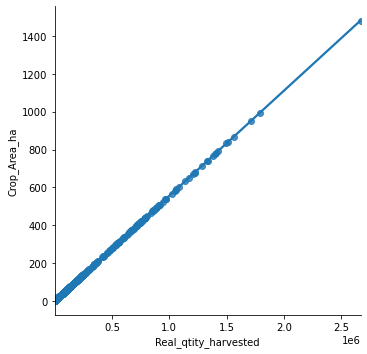

In [174]:
sns.lmplot(x='Real_qtity_harvested',y='Crop_Area_ha',data=Rice_df)

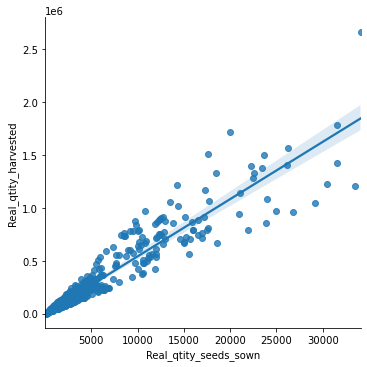

In [175]:
sns.lmplot(x='Real_qtity_seeds_sown',y='Real_qtity_harvested',data=Rice_df)

In [176]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [177]:
#Rice_df.info()

In [178]:
Qtity_organic_fertiliser=[]
for organic in rice_data:
    #area=organic[45]
    j=organic[-5]
    if j==0:
        Qtity_organic_fertiliser.append(1800) 
    elif (j>0)&(j<=50):
        Qtity_organic_fertiliser.append(2100)
    elif (j>50)&(j<=100):
        Qtity_organic_fertiliser.append(2200)
    elif (j>100)&(j<=150):
        Qtity_organic_fertiliser.append(2300)
    elif (j>150)&(j<=200):
        Qtity_organic_fertiliser.append(2400)
    elif (j>200)&(j<=250):
        Qtity_organic_fertiliser.append(2500)
    elif (j>250)&(j<=300):
        Qtity_organic_fertiliser.append(2600)
    elif (j>300)&(j<=400):
        Qtity_organic_fertiliser.append(2700)
    elif (j>400)&(j<=500):
        Qtity_organic_fertiliser.append(2800)
    elif (j>500)&(j<=700):
        Qtity_organic_fertiliser.append(2850)
    elif (j>700)&(j<=1000):
        Qtity_organic_fertiliser.append(2900)
    elif (j>1000)&(j<=1500):
        Qtity_organic_fertiliser.append(3000)
    elif (j>1500)&(j<=2000):
        Qtity_organic_fertiliser.append(3200)
    elif (j>15000):
        Qtity_Harvested.append(9000)
    elif (j>12000)&(j<=15000):
        Qtity_organic_fertiliser.append(8700)
    elif (j>10000)&(j<=12000):
        Qtity_organic_fertiliser.append(8500)
    elif (j>9000)&(j<=10000):
        Qtity_organic_fertiliser.append(8300)
    elif (j>8000)&(j<=9000):
        Qtity_organic_fertiliser.append(8100)
    else:
        Qtity_Harvested.append(j)

In [179]:
Rice_df['Total_qtity_organic_fertiliser']=Qtity_organic_fertiliser

In [180]:
Rice_df['Real_qtity_organic_fertiliser']=(Rice_df['Total_qtity_organic_fertiliser']*Rice_df['crop_area_sq'])/10000

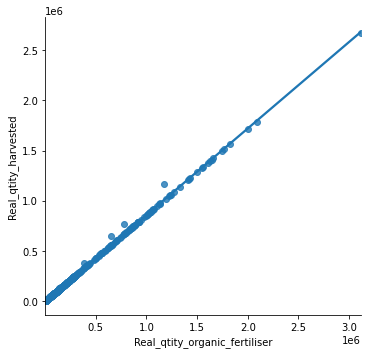

In [181]:
sns.lmplot(x='Real_qtity_organic_fertiliser',y='Real_qtity_harvested',data=Rice_df)

In [182]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [183]:
Rice_df[['Crop_Area_ha','inOrganic_fertiliser_type','inorganic_fertiliser_unity','total_qtity_inorganic_feltiliser']].head()

Crop_Area_ha inOrganic_fertiliser_type inorganic_fertiliser_unity  \
0      0.050242                       NaN                        NaN   
1      2.443043                       NaN                        NaN   
2      2.071633                       NaN                        NaN   
3    212.522522                       NaN                        NaN   
4    164.867599              NPK 17-17-17                         kg   

   total_qtity_inorganic_feltiliser  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                           17700.0

In [184]:
Rice_df['inOrganic_fertiliser_type'].value_counts()

NPK 17-17-17                               1635
Urea                                        514
DAP                                         116
Other inorganic fertilizer                   28
KCL/MOP                                      24
Other inorganic fertilizer (to specify)      22
Lliquid urea                                 13
NPK 20-10-10                                 11
NPK 25-5-5                                    2
Liquid urea                                   1
Name: inOrganic_fertiliser_type, dtype: int64

In [185]:
Rice_df['inOrganic_fertiliser_type']=Rice_df['inOrganic_fertiliser_type'].str.replace("NPK 20-10-10",'NPK 17-17-17')
Rice_df['inOrganic_fertiliser_type']=Rice_df['inOrganic_fertiliser_type'].str.replace("NPK 25-5-5",'NPK 17-17-17')
Rice_df['inOrganic_fertiliser_type']=Rice_df['inOrganic_fertiliser_type'].str.replace("Other inorganic fertilizer",'NPK 17-17-17')
Rice_df['inOrganic_fertiliser_type']=Rice_df['inOrganic_fertiliser_type'].str.replace("DAP",'Urea')

In [186]:
Rice_df['inOrganic_fertiliser_type'].value_counts()

NPK 17-17-17                 1676
Urea                          630
KCL/MOP                        24
NPK 17-17-17 (to specify)      22
Lliquid urea                   13
Liquid urea                     1
Name: inOrganic_fertiliser_type, dtype: int64

In [187]:
Rice_df['inOrganic_fertiliser_type']=Rice_df['inOrganic_fertiliser_type'].str.replace("NPK 17-17-17 (to specify)",'NPK 17-17-17')

In [188]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [189]:
Inorganic_fert_npk=[]
for inorganic in rice_data:
    npk=inorganic[23]
    qtity=inorganic[25]
    if npk=='NPK 17-17-17':
        Inorganic_fert_npk.append(qtity)
    else:
        Inorganic_fert_npk.append(0)


In [190]:
Rice_df['Qtity_inorganic_npk']=Inorganic_fert_npk

In [191]:
Inorganic_fert_uree=[]
for inorganic in rice_data:
    uree=inorganic[23]
    unity=inorganic[24]
    qtity=inorganic[25]
    if (uree=='Urea')&(unity=='g'):
        Inorganic_fert_uree.append(qtity/1000)
    elif (uree=='Urea')&(unity=='kg'):
        Inorganic_fert_uree.append(qtity)  
    else:
        Inorganic_fert_uree.append(0)

In [192]:
Rice_df['Qtity_inorganic_urea']=Inorganic_fert_uree

In [193]:
#computing npk coefficient in meters
Rice_df['Coeff_inorganic_meter_npk']=Rice_df['Qtity_inorganic_npk']/Rice_df["crop_area_sq"]

In [194]:
Rice_df['Coeff_inorganic_npk']=Rice_df['Coeff_inorganic_meter_npk']*10000

In [195]:
Rice_df.head()

Unnamed: 0       combined_id   Unique_id  Segment_id Province_name  \
0         733  12111243Season A  12111243.0    121112.0        Kigali   
1         961    120019Season A    120019.0     12001.0        Kigali   
2         962   1200110Season A   1200110.0     12001.0        Kigali   
3         965    120071Season A    120071.0     12007.0         South   
4        1261    120071Season B    120071.0     12007.0        Kigali   

  District_name  Plot_number  Plot_Area_sqm Cropping_system  Number_of_crops  \
0        GASABO         43.0   5.024227e+02            Pure              1.0   
1        GASABO          9.0   2.443044e+04            Pure              1.0   
2        GASABO         10.0   2.071633e+04            Pure              1.0   
3        GASABO          1.0   2.125225e+06            Pure              1.0   
4        GASABO          1.0   1.648676e+06            Pure              1.0   

   ... Coeff_inorganic_fertiliser  Total_qtity_seeds_sown  \
0  ...                   0.000000               50.000000   
1  ...                   0.000000               21.000000   
2  ...                   0.000000               29.928083   
3  ...                   0.000000               50.000000   
4  ...                 107.358875               48.523785   

  Real_qtity_seeds_sown Real_qtity_harvested Total_qtity_organic_fertiliser  \
0              2.512114            90.436088                           1800   
1             51.303913          4397.478247                           1800   
2             62.000000          3728.939152                           1800   
3          10626.126099        382540.539551                           1800   
4           8000.000000        296761.679077                           2100   

  Real_qtity_organic_fertiliser  Qtity_inorganic_npk Qtity_inorganic_urea  \
0                     90.436088                  0.0                  0.0   
1                   4397.478247                  0.0                  0.0   
2                   3728.939152                  0.0                  0.0   
3                 382540.539551                  0.0                  0.0   
4                 346221.958923              17700.0                  0.0   

   Coeff_inorganic_meter_npk  Coeff_inorganic_npk  
0                   0.000000             0.000000  
1                   0.000000             0.000000  
2                   0.000000             0.000000  
3                   0.000000             0.000000  
4                   0.010736           107.358875  

[5 rows x 62 columns]

In [196]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [197]:
Qtity_transf_npk=[]
for npk in rice_data:
    pk=npk[-1]
    if pk>=10000:
        Qtity_transf_npk.append(300) 
    elif (pk>=3000)&(pk<10000):
        Qtity_transf_npk.append(280)
    elif (pk>=1000)&(pk<3000):
        Qtity_transf_npk.append(260)
    elif (pk>=500)&(pk<1000):
        Qtity_transf_npk.append(250)
    elif (pk>=400)&(pk<500):
        Qtity_transf_npk.append(240)
    elif (pk>=300)&(pk<400):
        Qtity_transf_npk.append(230)
    elif (pk>=250)&(pk<300):
        Qtity_transf_npk.append(210)
    elif (pk>=80)&(pk<100):
        Qtity_transf_npk.append(150)
    elif (pk>=60)&(pk<80):
        Qtity_transf_npk.append(140)
    elif (pk>=40)&(pk<60):
        Qtity_transf_npk.append(130)
    elif (pk>=20)&(pk<40):
        Qtity_transf_npk.append(120)
    elif (pk>0)&(pk<20):
        Qtity_transf_npk.append(110)
    elif pk==0:
        Qtity_transf_npk.append(100)
    else:
        Qtity_transf_npk.append(pk)

In [198]:
Rice_df['Total_qtity_npk']=Qtity_transf_npk

In [199]:
Rice_df['Real_qtity_organic_npk']=(Rice_df['Total_qtity_npk']*Rice_df['crop_area_sq'])/10000

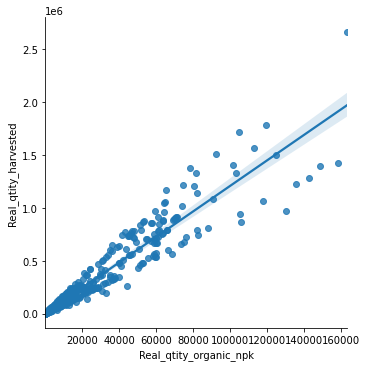

In [200]:
sns.lmplot(x='Real_qtity_organic_npk',y='Real_qtity_harvested',data=Rice_df)

In [201]:
#computing npk coefficient in meters
Rice_df['Coeff_inorganic_meter_urea']=Rice_df['Qtity_inorganic_urea']/Rice_df["crop_area_sq"]

In [202]:
Rice_df['Coeff_inorganic_urea']=Rice_df['Coeff_inorganic_meter_urea']*10000

In [203]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [204]:
#Rice_df.to_excel("Rice_df_inorganic.xlsx")

In [205]:
Qtity_transf_urea=[]
for urea in rice_data:
    ur=urea[-1]
    if ur>=1000:
        Qtity_transf_urea.append(180) 
    elif (ur>=200)&(ur<1000):
        Qtity_transf_urea.append(150)
    elif (ur>=40)&(ur<50):
        Qtity_transf_urea.append(100)
    elif (ur>=30)&(ur<40):
        Qtity_transf_urea.append(90)
    elif (ur>=20)&(ur<30):
        Qtity_transf_urea.append(80)
    elif (ur>=10)&(ur<20):
        Qtity_transf_urea.append(75)
    elif (ur>=0)&(ur<10):
        Qtity_transf_urea.append(65)
    elif (ur==0):
        Qtity_transf_urea.append(60)
    else:
        Qtity_transf_urea.append(ur)
    

In [206]:
Rice_df['Total_qtity_uree']=Qtity_transf_urea

In [207]:
Rice_df['Real_qtity_organic_urea']=(Rice_df['Total_qtity_uree']*Rice_df['crop_area_sq'])/10000

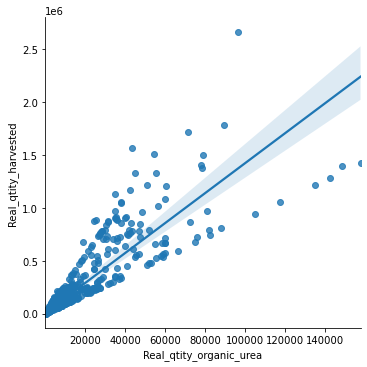

In [208]:
sns.lmplot(x='Real_qtity_organic_urea',y='Real_qtity_harvested',data=Rice_df)

In [209]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [210]:
rice_data1=Rice_df.values

In [211]:
Precipitation_new1=[]
for prec in rice_data1:
    i=prec[-13]
    p=prec[-25]
    
    if (i>=1800000):
        Precipitation_new1.append(850)
    elif (i>=1600000) & (i<1800000):
        Precipitation_new1.append(810)
    elif (i>=1200000) & (i<1500000):
        Precipitation_new1.append(810)
    elif (i>=1000000) & (i<1200000):
        Precipitation_new1.append(800)
    elif (i>=900000) & (i<1000000):
        Precipitation_new1.append(820)
    elif (i>=820000) & (i<900000):
        Precipitation_new1.append(810)
    elif (i>=750000) & (i<820000):
        Precipitation_new1.append(805)
    elif (i>=650000) & (i<750000):
        Precipitation_new1.append(620)
    elif (i>=550000) & (i<650000):
        Precipitation_new1.append(600)
    elif (i>=450000) & (i<550000):
        Precipitation_new1.append(600)
    elif (i>=350000) & (i<450000):
        Precipitation_new1.append(590)
    elif (i>=250000) & (i<350000):
        Precipitation_new1.append(500)
    elif (i>=150000) & (i<250000):
        Precipitation_new1.append(510)
    elif (i>=120000) & (i<150000):
        Precipitation_new1.append(495)
    elif (i>=110000) & (i<120000):
        Precipitation_new1.append(490)
    elif (i>=100000) & (i<110000):
        Precipitation_new1.append(492)
    elif (i>=90000) & (i<100000):
        Precipitation_new1.append(500)
    elif (i>=80000) & (i<90000):
        Precipitation_new1.append(510)
    elif (i>=70000) & (i<80000):
        Precipitation_new1.append(510)
    elif (i>=60000) & (i<70000):
        Precipitation_new1.append(500)
    elif (i>=40000) & (i<60000):
        Precipitation_new1.append(495)
    elif (i>=20000) & (i<40000):
        Precipitation_new1.append(490)
    elif (i>=10000) & (i<20000):
        Precipitation_new1.append(520)
    elif (i>=5000) & (i<10000):
        Precipitation_new1.append(500)
    
    
        
    elif i<20:
        Precipitation_new1.append(250)
    elif (i>=20) & (i<100):
        Precipitation_new1.append(280)
    elif (i>=100) & (i<300):
        Precipitation_new1.append(320)
    elif (i>=300) & (i<550):
        Precipitation_new1.append(340)
    elif (i>=550) & (i<800):
        Precipitation_new1.append(370)
    elif (i>=800) & (i<1100):
        Precipitation_new1.append(400)
    elif (i>=1100) & (i<1300):
        Precipitation_new1.append(430)
    elif (i>=1300) & (i<1500):
        Precipitation_new1.append(460)
    elif (i>=1500) & (i<1800):
        Precipitation_new1.append(490)
    elif (i>=1800) & (i<1900):
        Precipitation_new1.append(520)
    elif (i>=1900) & (i<2000):
        Precipitation_new1.append(550)
    elif (i>=2000) & (i<2100):
        Precipitation_new1.append(580)
    elif (i>=2100) & (i<2200):
        Precipitation_new1.append(600)
    elif (i>=2200) & (i<2500):
        Precipitation_new1.append(645)
    elif (i>=2500) & (i<2600):
        Precipitation_new1.append(660)
    elif (i>=2600) & (i<2700):
        Precipitation_new1.append(670)
    elif (i>=2700) & (i<2800):
        Precipitation_new1.append(680)
    elif (i>=2800) & (i<2900):
        Precipitation_new1.append(685)
    elif (i>=2900) & (i<3000):
        Precipitation_new1.append(690)
    elif (i>=3000) & (i<3300):
        Precipitation_new1.append(695)
    elif (i>=3300) & (i<3600):
        Precipitation_new1.append(700)
    elif (i>=3600) & (i<4000):
        Precipitation_new1.append(705)
    elif (i>=4000) & (i<4300):
        Precipitation_new1.append(710)
    elif (i>=4300) & (i<4500):
        Precipitation_new1.append(715)
    elif (i>=4500) & (i<4800):
        Precipitation_new1.append(720)
    elif (i>=4800) & (i<5000):
        Precipitation_new1.append(725)
       
    else:
        Precipitation_new1.append(p)
    
        
        
        

In [212]:
Rice_df['Precipitation_new_one']=Precipitation_new1

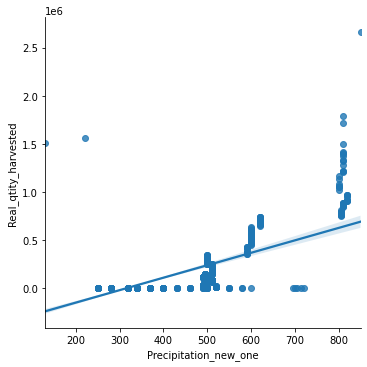

In [213]:
sns.lmplot(x='Precipitation_new_one',y='Real_qtity_harvested',data=Rice_df)

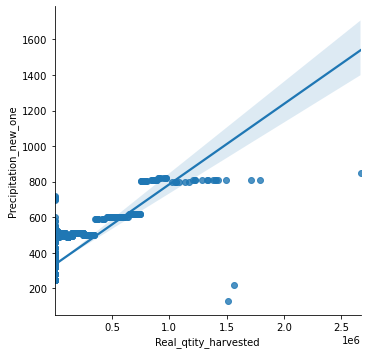

In [214]:
sns.lmplot(x='Real_qtity_harvested',y='Precipitation_new_one',data=Rice_df)

# Working on Solar Radiation

In [215]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [216]:
rice_data2=Rice_df.values

In [217]:
radiation=[]
for solar in rice_data2:
    i=solar[-14]
    r=solar[-31]
    
    if (i>=1800000):
        radiation.append(405)
    elif (i>=1600000) & (i<1800000):
        radiation.append(395)
    elif (i>=1200000) & (i<1500000):
        radiation.append(390)
    elif (i>=1000000) & (i<1200000):
        radiation.append(380)
    elif (i>=900000) & (i<1000000):
        radiation.append(365)
    elif (i>=820000) & (i<900000):
        radiation.append(360)
    elif (i>=750000) & (i<820000):
        radiation.append(350)
    elif (i>=650000) & (i<750000):
        radiation.append(345)
    elif (i>=550000) & (i<650000):
        radiation.append(340)
    elif (i>=450000) & (i<550000):
        radiation.append(330)
    elif (i>=350000) & (i<450000):
        radiation.append(320)
    elif (i>=300000) & (i<350000):
        radiation.append(240)
    elif (i>=280000) & (i<300000):
        radiation.append(225)
    elif (i>=260000) & (i<280000):
        radiation.append(215)
    elif (i>=240000) & (i<260000):
        radiation.append(205)
    elif (i>=230000) & (i<240000):
        radiation.append(200)
    elif (i>=220000) & (i<230000):
        radiation.append(200)
    elif (i>=200000) & (i<220000):
        radiation.append(210)
    elif (i>=180000) & (i<200000):
        radiation.append(200)
    elif (i>=1500000) & (i<180000):
        radiation.append(190)
    elif (i>=120000) & (i<150000):
        radiation.append(225)
    elif (i>=110000) & (i<120000):
        radiation.append(200)
    elif (i>=100000) & (i<110000):
        radiation.append(190)
    elif (i>=90000) & (i<100000):
        radiation.append(243)
    elif (i>=80000) & (i<90000):
        radiation.append(220)
    elif (i>=70000) & (i<80000):
        radiation.append(210)
    elif (i>=60000) & (i<70000):
        radiation.append(190)
    elif (i>=40000) & (i<60000):
        radiation.append(192)
    elif (i>=20000) & (i<40000):
        radiation.append(180)
    elif (i>=10000) & (i<20000):
        radiation.append(178)
    elif (i>=5000) & (i<10000):
        radiation.append(175)
    
    
        
    elif i<20:
        radiation.append(30)
    elif (i>=20) & (i<100):
        radiation.append(35)
    elif (i>=100) & (i<300):
        radiation.append(40)
    elif (i>=300) & (i<550):
        radiation.append(60)
    elif (i>=550) & (i<800):
        radiation.append(50)
    elif (i>=800) & (i<1100):
        radiation.append(70)
    elif (i>=1100) & (i<1300):
        radiation.append(80)
    elif (i>=1300) & (i<1500):
        radiation.append(60)
    elif (i>=1500) & (i<1800):
        radiation.append(90)
    elif (i>=1800) & (i<1900):
        radiation.append(95)
    elif (i>=1900) & (i<2000):
        radiation.append(100)
    elif (i>=2000) & (i<2100):
        radiation.append(105)
    elif (i>=2100) & (i<2200):
        radiation.append(80)
    elif (i>=2200) & (i<2500):
        radiation.append(120)
    elif (i>=2500) & (i<2600):
        radiation.append(125)
    elif (i>=2600) & (i<2700):
        radiation.append(130)
    elif (i>=2700) & (i<2800):
        radiation.append(135)
    elif (i>=2800) & (i<2900):
        radiation.append(120)
    elif (i>=2900) & (i<3000):
        radiation.append(140)
    elif (i>=3000) & (i<3300):
        radiation.append(145)
    elif (i>=3300) & (i<3600):
        radiation.append(150)
    elif (i>=3600) & (i<4000):
        radiation.append(155)
    elif (i>=4000) & (i<4300):
        radiation.append(160)
    elif (i>=4300) & (i<4500):
        radiation.append(165)
    elif (i>=4500) & (i<4800):
        radiation.append(130)
    elif (i>=4800) & (i<5000):
        radiation.append(155)
       
    else:
        radiation.append(r)
    
        
        
        

In [218]:
Rice_df['Radion_new']=radiation

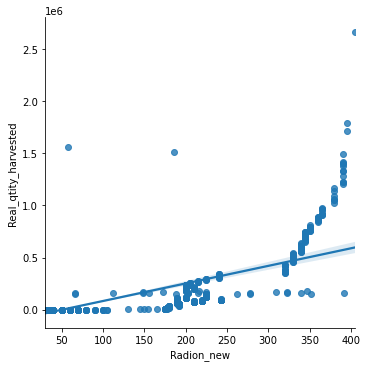

In [219]:
sns.lmplot(x='Radion_new',y='Real_qtity_harvested', data=Rice_df)

Text(0.5, 1.0, 'Correlation between numeric variables of SAS')

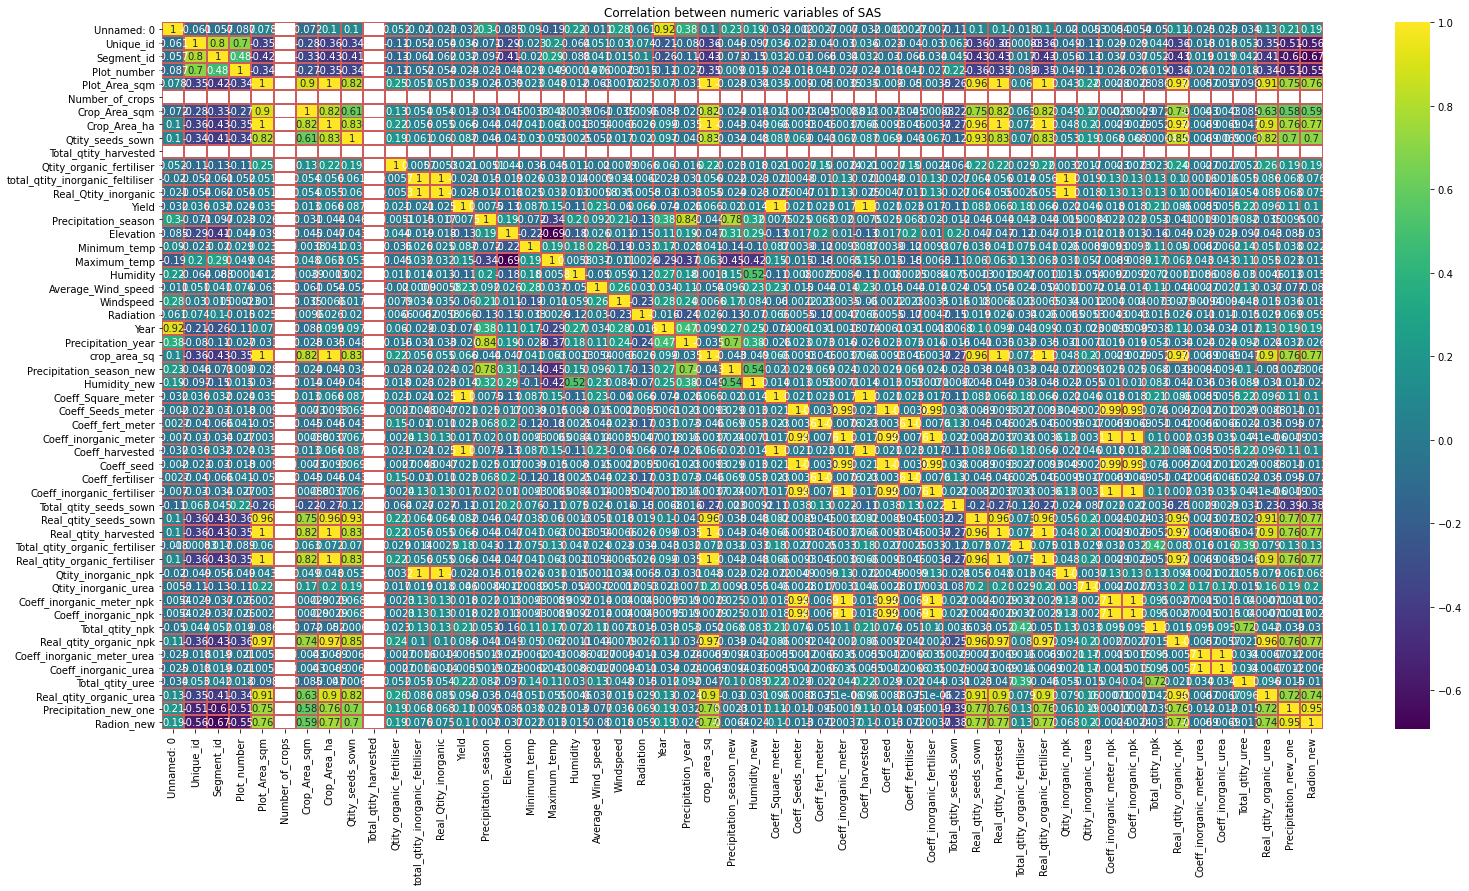

In [220]:
plt.figure(figsize=(26,13))
sns.heatmap(Rice_df.corr(), annot=True,cmap='viridis',linecolor='indianred',linewidths=1)
plt.title("Correlation between numeric variables of SAS")

In [221]:
#Rice_df['inOrganic_fertiliser_type']=Rice_df['inOrganic_fertiliser_type'].map({"NPK 17-17-17 (to specify)":'NPK 17-17-17'})

In [222]:
quantile1=Rice_df['Average_Wind_speed'].quantile(0.25)
quantile3=Rice_df['Average_Wind_speed'].quantile(0.75)
iqr=quantile3-quantile1 # find interquartile of each crop in district
high_value=(1.5*iqr)+quantile3 # find the highest value of outliers
low_value=quantile1-(1.5*iqr) 

In [223]:
mean = Rice_df.loc[Rice_df['Average_Wind_speed']<high_value, 'Average_Wind_speed'].mean()
Rice_df['Average_Wind_speed']= np.where(Rice_df['Average_Wind_speed'] >high_value, mean,Rice_df['Average_Wind_speed'])

<AxesSubplot:>

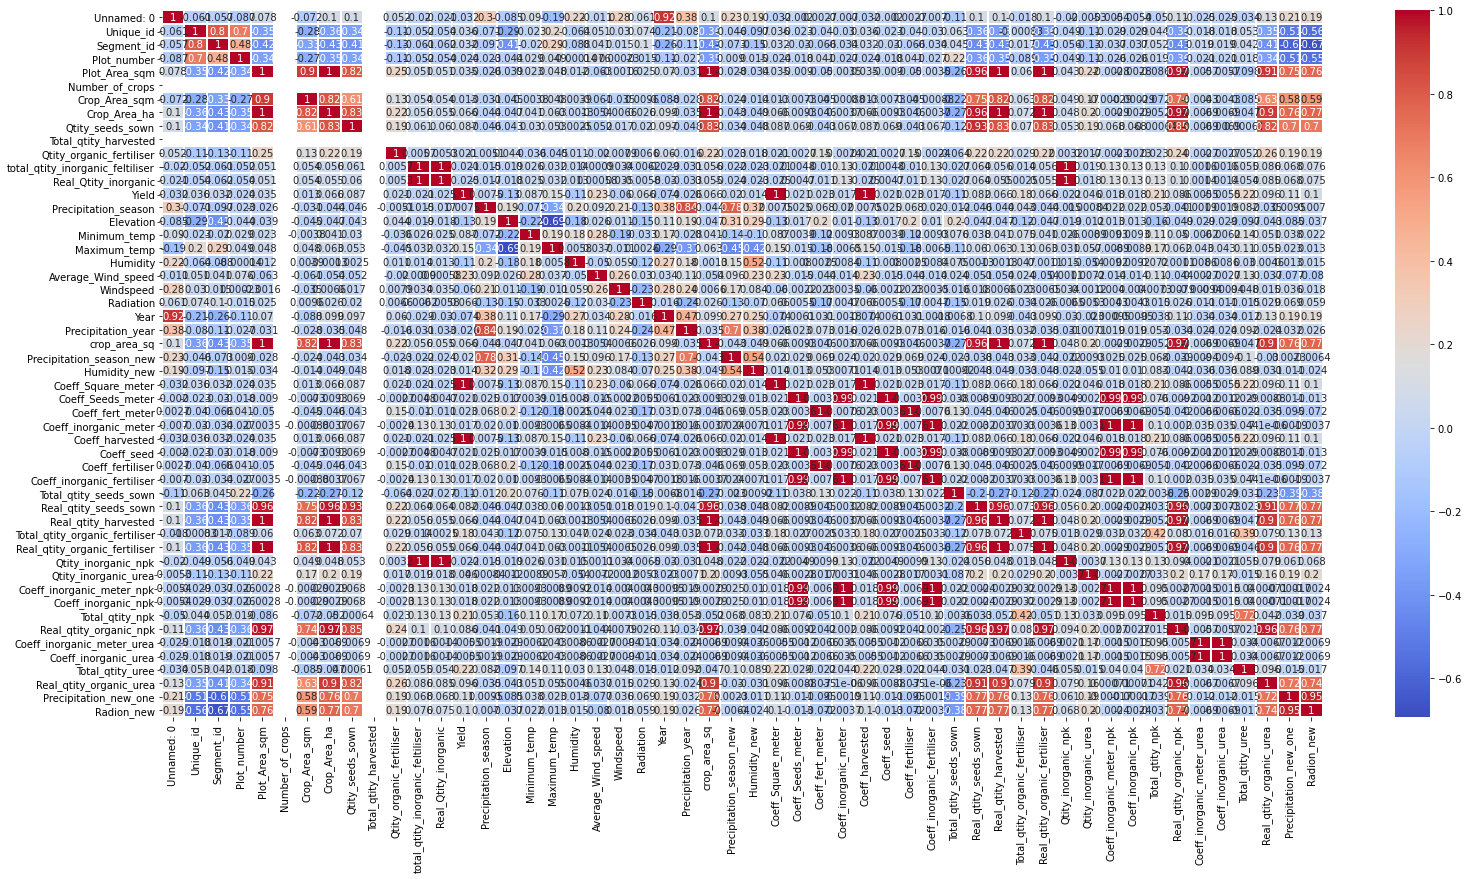

In [224]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(26,13))
sns.heatmap(Rice_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [225]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

C:\Users\Jean Damascene\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Yield', ylabel='Density'>

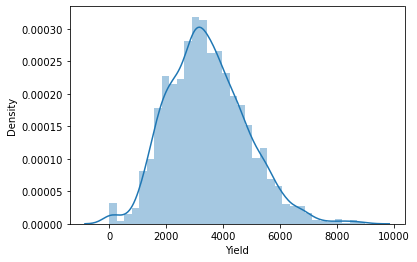

In [226]:
sns.distplot(Rice_df['Yield'])

In [227]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

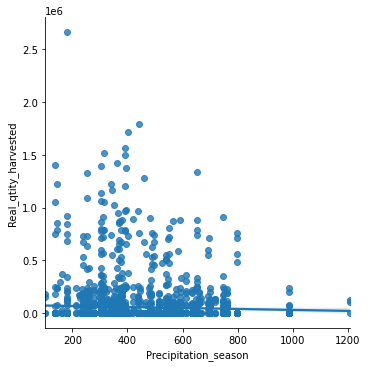

In [228]:
sns.lmplot(x='Precipitation_season',y='Real_qtity_harvested',data=Rice_df)

In [229]:
df=Rice_df.sort_values('Crop_Area_ha',ascending=False)

<AxesSubplot:xlabel='Crop_Area_ha', ylabel='Yield'>

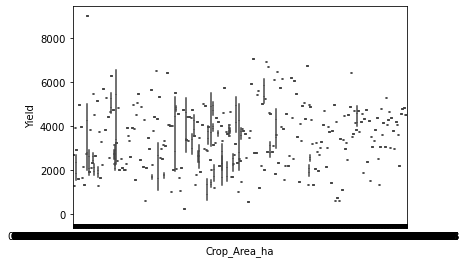

In [230]:
sns.boxplot(x='Crop_Area_ha',y='Yield',data=df)

Province_name
East      AxesSubplot(0.125,0.125;0.775x0.755)
Kigali    AxesSubplot(0.125,0.125;0.775x0.755)
North     AxesSubplot(0.125,0.125;0.775x0.755)
South     AxesSubplot(0.125,0.125;0.775x0.755)
West      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Yield, dtype: object

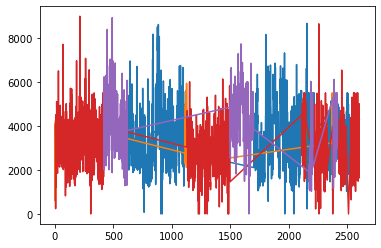

In [231]:
Rice_df.groupby('Province_name')['Yield'].plot()

In [232]:
Rice_df['Yield'].max()

8981.488365358065

In [233]:
Rice_df['Yield'].min()

0.0

In [234]:
Rice_df[Rice_df['Yield']==0.0].shape

(15, 70)

In [235]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [236]:
q1=Rice_df['Yield'].quantile(0.25)
q3=Rice_df['Yield'].quantile(0.75)
iqr=q3-q1 # find interquartile of each crop in district
high_value=(1.5*iqr)+q3 # find the highest value of outliers
low_value=q1-(1.5*iqr) # find the smallest value of outliers for each crops

In [237]:
print(high_value)
print(low_value)
print(q1)
print(q3)
print(iqr)

7072.8256515934445
-324.3151367460018
2449.6126588812904
4298.897855966152
1849.2851970848615


In [238]:
mean = Rice_df.loc[Rice_df['Yield']<high_value, 'Yield'].mean()
print(mean)

3396.8600737770043


In [239]:
median = Rice_df.loc[Rice_df['Yield']<high_value, 'Yield'].median()
Rice_df['Yield']= np.where(Rice_df['Yield'] >high_value, mean,Rice_df['Yield'])

In [240]:
print(median)

3314.3680377613946


<AxesSubplot:>

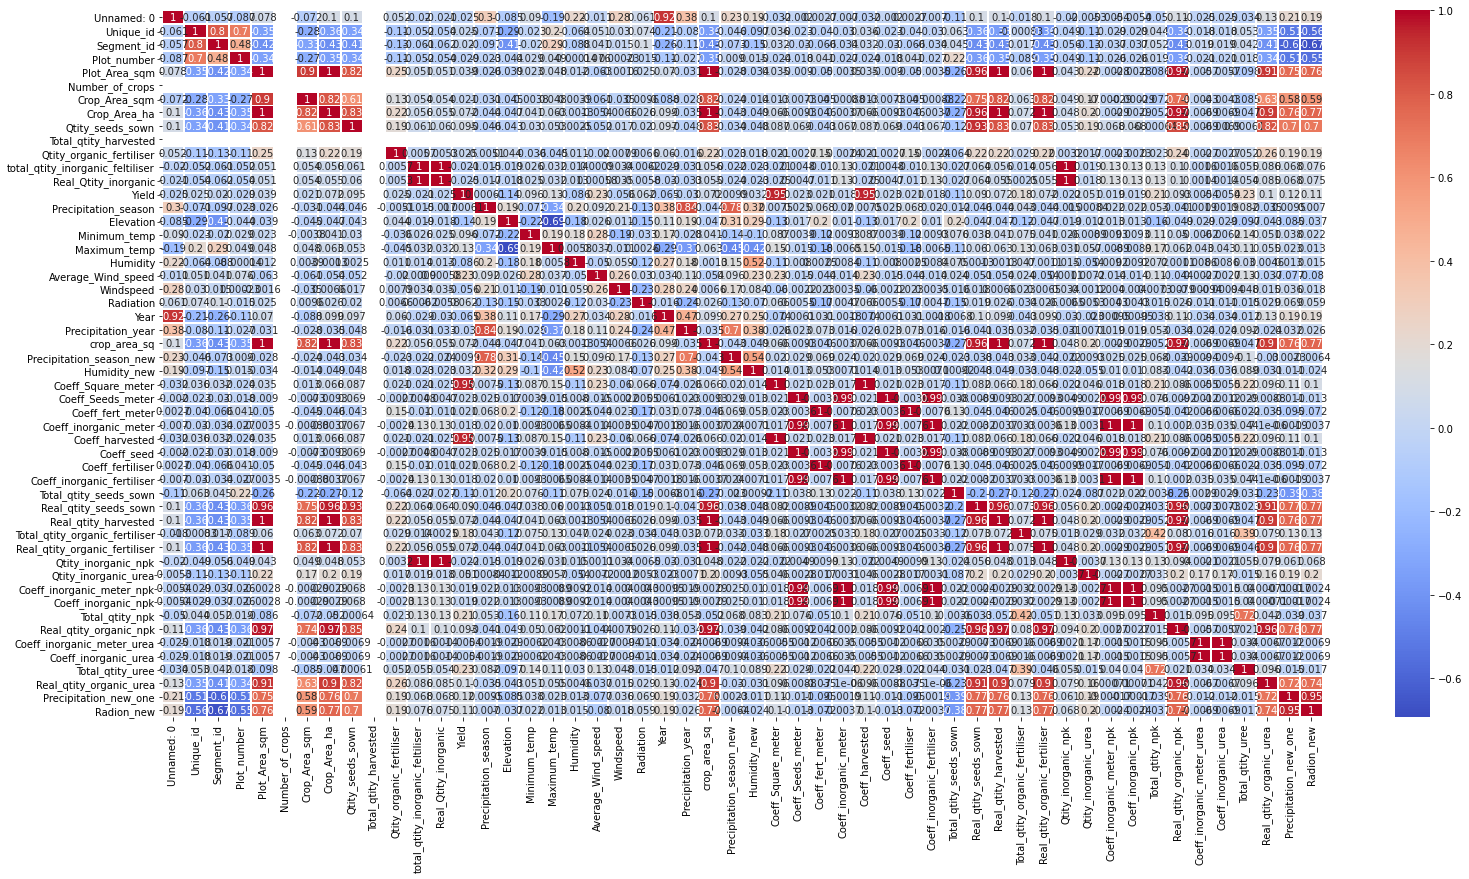

In [241]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(26,13))
sns.heatmap(Rice_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

C:\Users\Jean Damascene\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Yield', ylabel='Density'>

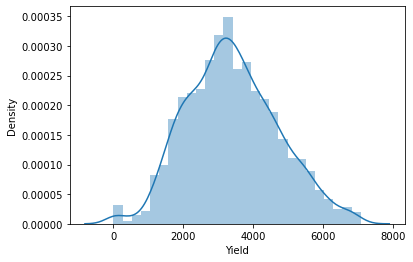

In [242]:
sns.distplot(Rice_df['Yield'])

In [243]:
district_Areagrp_Rice=pd.DataFrame(Rice_df.groupby('District_name')['Crop_Area_ha'].mean()).reset_index()
district_Areagrp_Rice.head()

District_name  Crop_Area_ha
0      BUGESERA     35.165569
1        GASABO     53.978408
2       GATSIBO    129.696265
3      GISAGARA     31.961782
4          HUYE     14.609628

In [244]:
Rice_district=pd.DataFrame(Rice_df.groupby('District_name')['Yield'].mean()).reset_index()
Rice_district.head()

District_name        Yield
0      BUGESERA  3436.384497
1        GASABO  3624.604237
2       GATSIBO  3297.629736
3      GISAGARA  2865.275784
4          HUYE  3166.735520

In [245]:
df_area_yld_Rice=pd.merge(district_Areagrp_Rice,Rice_district, on='District_name')
df_area_yld_Rice.head()

District_name  Crop_Area_ha        Yield
0      BUGESERA     35.165569  3436.384497
1        GASABO     53.978408  3624.604237
2       GATSIBO    129.696265  3297.629736
3      GISAGARA     31.961782  2865.275784
4          HUYE     14.609628  3166.735520

In [246]:
df_area_yld_Rice.sort_values(by='Crop_Area_ha', inplace=True)

In [247]:
trace1= {'type' : 'scatter',
             'x' : df_area_yld_Rice['Crop_Area_ha'],
             'y' : df_area_yld_Rice['Yield'],
             'name' : 'MAize Area and yield relationship per district',
             'mode' : 'lines'}
data=Data([trace1])
layout = {'title' : 'Area and yield per district',
         'xaxis' : {'title' : 'Maize area per hectares'},
         'yaxis' : {'title' : 'Maize yield'}}

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [248]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [249]:
#Maize grouped per agriculture year
Rice_district_year_yield=pd.DataFrame(Rice_df.groupby(['District_name','Agri_year'])['Yield'].mean()).reset_index()
Rice_district_year_yield.head()

District_name  Agri_year        Yield
0      BUGESERA  2016_2017  4148.402700
1      BUGESERA  2017_2018  2831.048188
2      BUGESERA  2018_2019  3873.009205
3        GASABO  2016_2017  3386.484583
4        GASABO  2017_2018  3693.664669

In [250]:
Rice_district_year_yield=Rice_district_year_yield.drop(Rice_district_year_yield.index[41])

In [251]:
# Maize yield per agriculture year in every district
Rice_district_year_yield_pvt=Rice_district_year_yield.pivot(index='District_name',columns='Agri_year', values='Yield')
Rice_district_year_yield_pvt=Rice_district_year_yield_pvt.reset_index()
Rice_district_year_yield_pvt.head()

Agri_year District_name    2016_2017    2017_2018    2018_2019
0              BUGESERA  4148.402700  2831.048188  3873.009205
1                GASABO  3386.484583  3693.664669  3730.266250
2               GATSIBO  3253.811339  3066.962741  4276.379465
3              GISAGARA  3087.886797  2676.921640  2765.550251
4                  HUYE  3493.148777  2936.718079  2806.968163

In [252]:
df_merged_area_yield=pd.merge(district_Areagrp_Rice,Rice_district_year_yield_pvt, on='District_name')
df_merged_area_yield.head()

District_name  Crop_Area_ha    2016_2017    2017_2018    2018_2019
0      BUGESERA     35.165569  4148.402700  2831.048188  3873.009205
1        GASABO     53.978408  3386.484583  3693.664669  3730.266250
2       GATSIBO    129.696265  3253.811339  3066.962741  4276.379465
3      GISAGARA     31.961782  3087.886797  2676.921640  2765.550251
4          HUYE     14.609628  3493.148777  2936.718079  2806.968163

In [253]:
df_merged_area_yield.fillna(0, inplace=True)
#df_merged_area_yield.dropna(inplace=True)

In [254]:
df_merged_area_yield.sort_values(by='Crop_Area_ha', inplace=True)

In [255]:
df_merged_area_yield.head()

District_name  Crop_Area_ha    2016_2017    2017_2018    2018_2019
11     NGORORERO      0.059463  3531.617298     0.000000     0.000000
7       KICUKIRO      0.107320     0.000000  3958.570971     0.000000
13    NYAMASHEKE     11.208390  3635.612056  3718.316132  2465.917838
4           HUYE     14.609628  3493.148777  2936.718079  2806.968163
18     RWAMAGANA     15.812564  3762.370735  3735.232805  3341.086047

In [256]:
trace10= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

trace20= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

trace30= {'type' : 'scatter',
             'x' : df_merged_area_yield['Crop_Area_ha'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

In [257]:
data=Data([trace10,trace20,trace30])
layout = {'title' : 'Paddy rice yield from 2017 - 2019',
         'xaxis' : {'title' : 'Paddy rice area in hectares'},
         'yaxis' : {'title' : 'Paddy rice yield'} 
         }

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [258]:
fig = Figure(data = data, layout = layout)
pyo.iplot(fig)

In [259]:
#Working on smothing lines +markers
smothingtrace12= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2016_2017'],
             'name' : '2016_2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace22= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2017_2018'],
             'name' : '2017_2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace32= {'type' : 'scatter',
             'x' : df_merged_area_yield['District_name'],
             'y' : df_merged_area_yield['2018_2019'],
             'name' : '2018_2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}


In [260]:
data3=Data([smothingtrace12,smothingtrace22,smothingtrace32])
layout3 = {'title' : 'Paddy rice yield from 2017 - 2019',
         'xaxis' : {'title' : 'District names'},
         'yaxis' : {'title' : 'Paddy riceyield'} 
         }

In [261]:
fig3 = Figure(data = data3, layout = layout3)
pyo.iplot(fig3)

In [262]:
#grouping yield per season in every district
Rice_district_season=pd.DataFrame(Rice_df.groupby(['District_name','Season1'])['Yield'].mean()).reset_index()
Rice_district_season.head()

District_name      Season1        Yield
0      BUGESERA  SeasonA2017  3830.462974
1      BUGESERA  SeasonA2018  2658.625675
2      BUGESERA  SeasonA2019  4007.103135
3      BUGESERA  SeasonB2017  4182.642363
4      BUGESERA  SeasonB2018  3147.156129

In [263]:
#Grouping the maize yield in every season per district
Rice_district_season_pvt=Rice_district_season.pivot(index='District_name',columns='Season1', values='Yield')
Rice_district_season_pvt=Rice_district_season_pvt.reset_index()
Rice_district_season_pvt.head()

Season1 District_name  SeasonA2017  SeasonA2018  SeasonA2019  SeasonB2017  \
0            BUGESERA  3830.462974  2658.625675  4007.103135  4182.642363   
1              GASABO  3171.647925  2763.597047  3281.596847  4245.831214   
2             GATSIBO  3098.067151  3011.487404  4387.882578  3505.398104   
3            GISAGARA  3165.246734  2838.673975  2654.587414  3028.209132   
4                HUYE  3658.193502  3083.524450  3048.569138  3286.227031   

Season1  SeasonB2018  SeasonB2019  
0        3147.156129  3759.545110  
1        3926.181575  3999.467892  
2        3143.241329  4164.876352  
3        2554.274266  2878.494567  
4        2789.911707  2573.420555

In [264]:
#Rice_district_season_pvt=Rice_district_season_pvt.drop(Rice_district_season_pvt.index[15])

In [265]:
#Rice_district_season_pvt.dropna(inplace=True)
Rice_district_season_pvt.fillna(0,inplace=True)

In [266]:
Rice_district_season_pvt.to_excel("Paddy_rice_season_pvt.xlsx")

In [267]:
#Working on smothing lines +markers
smothingtrace13= {'type' : 'scatter',
             'x' : Rice_district_season_pvt['District_name'],
             'y' : Rice_district_season_pvt['SeasonA2017'],
             'name' : 'Season A 2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace23= {'type' : 'scatter',
             'x' : Rice_district_season_pvt['District_name'],
             'y' : Rice_district_season_pvt['SeasonA2018'],
             'name' : 'Season A 2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace33= {'type' : 'scatter',
             'x' : Rice_district_season_pvt['District_name'],
             'y' : Rice_district_season_pvt['SeasonA2019'],
             'name' : 'Season A 2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace43= {'type' : 'scatter',
             'x' : Rice_district_season_pvt['District_name'],
             'y' : Rice_district_season_pvt['SeasonB2017'],
             'name' : 'Season B 2017',
             'mode' : 'lines+markers',
             'line' : {'smoothing' : 0.8,
                        'shape' : 'spline'}}

smothingtrace53= {'type' : 'scatter',
             'x' : Rice_district_season_pvt['District_name'],
             'y' : Rice_district_season_pvt['SeasonB2018'],
             'name' : 'Season B 2018',
             'mode' : 'lines+markers',
         'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}

smothingtrace63= {'type' : 'scatter',
             'x' : Rice_district_season_pvt['District_name'],
             'y' : Rice_district_season_pvt['SeasonB2019'],
             'name' : 'Season B 2019',
             'mode' : 'lines+markers',
                 'line' : {'smoothing' : 1.3,
                        'shape' : 'spline'}}



In [268]:
data4=Data([smothingtrace13,smothingtrace23,smothingtrace33,smothingtrace43,smothingtrace53,
          smothingtrace63])

layout4 = {'title' : 'Paddy rice yield per season in every district',
         'xaxis' : {'title' : 'District name'},
         'yaxis' : {'title' : ' Paddy rice yield'}}

C:\Users\Jean Damascene\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [269]:
fig = Figure(data = data4, layout = layout4)
pyo.iplot(fig)

In [270]:
Agri_years = list(Rice_district_year_yield['Agri_year'].unique())
Agri_years

['2016_2017', '2017_2018', '2018_2019']

In [271]:
traces = []
for y in Agri_years:
    traces.append({'type' : 'bar',
                  'name' : str(y),
                  'x' : Rice_district_year_yield.loc[Rice_district_year_yield['Agri_year'] == y, 'District_name'],
                  'y' : Rice_district_year_yield.loc[Rice_district_year_yield['Agri_year'] == y, 'Yield']})
    
layout = {'title' : "Paddy rice yield by Agriculture year in all districts",
         'xaxis' : {'title' : 'District_name'},
         'yaxis' : {'title' : 'Paddy rice yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : traces, 'layout' : layout}
pyo.iplot(fig)

In [272]:
Rice_season=pd.DataFrame(Rice_df.groupby('Season1')['Yield'].mean())
Rice_season.head()

Yield
Season1                 
SeasonA2017  3547.534583
SeasonA2018  3357.362416
SeasonA2019  3130.349181
SeasonB2017  3388.929489
SeasonB2018  3465.461273

In [273]:
Rice_yield = {'type' : 'bar',
                     'x' : Rice_season.index,
                     'y' : Rice_season['Yield'],
                     'marker' : {'color' : 'indianred',
                                'line' : {'color' : '#333',
                                          'width' : 3}},
                     'opacity' : 0.5,}
                     
#lightblue
layout = {'title' : "Paddy rice yield by season from 2017 to 2019",
         'xaxis' : {'title' : 'Seasons'},
         'yaxis' : {'title' : 'Paddy rice yield'},
         'annotations' : [{
                          'font' : {'color' : 'grey',
                                   'size' : 10},
                          'xref' : 'paper',
                          'yref' : 'paper',
                          'x' : 0,
                          'y' : -0.2,
                          'showarrow' : False}]}
fig = {'data' : [Rice_yield],
      'layout' : layout}
pyo.iplot(fig)

In [274]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

# Working on environment Factors

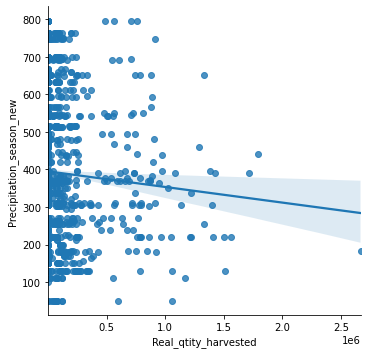

In [275]:
sns.lmplot(x='Real_qtity_harvested',y='Precipitation_season_new',data=Rice_df)

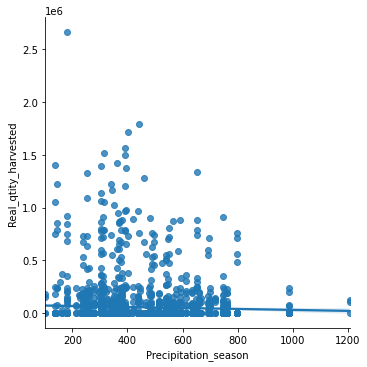

In [276]:
sns.lmplot(x='Precipitation_season',y='Real_qtity_harvested',data=Rice_df)

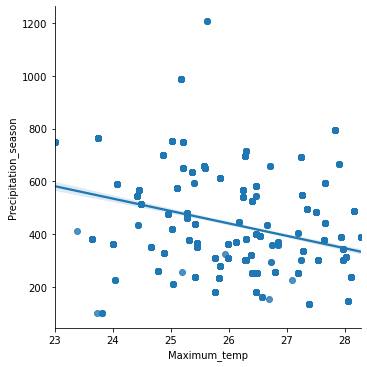

In [277]:
sns.lmplot(x='Maximum_temp',y='Precipitation_season',data=Rice_df)

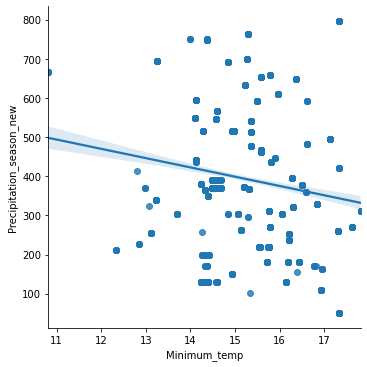

In [278]:
sns.lmplot(x='Minimum_temp',y='Precipitation_season_new',data=Rice_df)

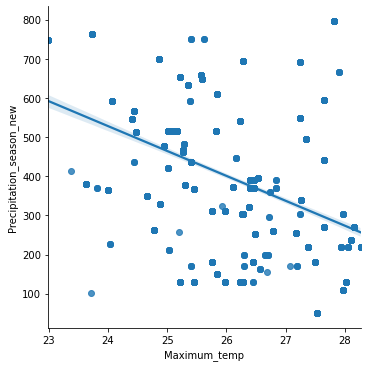

In [279]:
sns.lmplot(x='Maximum_temp',y='Precipitation_season_new',data=Rice_df)

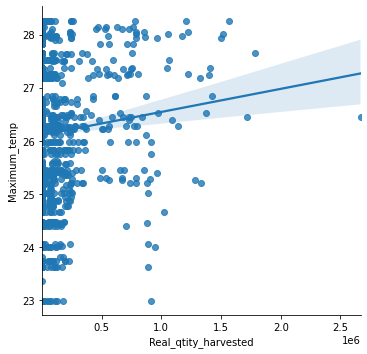

In [280]:
sns.lmplot(x='Real_qtity_harvested',y='Maximum_temp',data=Rice_df)

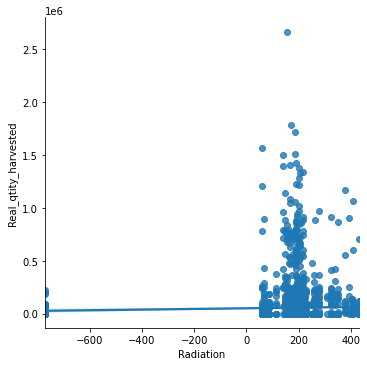

In [281]:
sns.lmplot(x='Radiation',y='Real_qtity_harvested',data=Rice_df)

In [282]:
Rice_df.to_csv("Rice_dframe.csv")

In [283]:
Rice_df.head()

Unnamed: 0       combined_id   Unique_id  Segment_id Province_name  \
0         733  12111243Season A  12111243.0    121112.0        Kigali   
1         961    120019Season A    120019.0     12001.0        Kigali   
2         962   1200110Season A   1200110.0     12001.0        Kigali   
3         965    120071Season A    120071.0     12007.0         South   
4        1261    120071Season B    120071.0     12007.0        Kigali   

  District_name  Plot_number  Plot_Area_sqm Cropping_system  Number_of_crops  \
0        GASABO         43.0   5.024227e+02            Pure              1.0   
1        GASABO          9.0   2.443044e+04            Pure              1.0   
2        GASABO         10.0   2.071633e+04            Pure              1.0   
3        GASABO          1.0   2.125225e+06            Pure              1.0   
4        GASABO          1.0   1.648676e+06            Pure              1.0   

   ... Coeff_inorganic_meter_npk  Coeff_inorganic_npk Total_qtity_npk  \
0  ...                  0.000000             0.000000      100.000000   
1  ...                  0.000000             0.000000      100.000000   
2  ...                  0.000000             0.000000      100.000000   
3  ...                  0.000000             0.000000      100.000000   
4  ...                  0.010736           107.358875      107.358875   

  Real_qtity_organic_npk Coeff_inorganic_meter_urea Coeff_inorganic_urea  \
0               5.024227                        0.0                  0.0   
1             244.304347                        0.0                  0.0   
2             207.163286                        0.0                  0.0   
3           21252.252197                        0.0                  0.0   
4           17700.000000                        0.0                  0.0   

   Total_qtity_uree Real_qtity_organic_urea  Precipitation_new_one  Radion_new  
0         65.000000                3.265748                  280.0        35.0  
1         65.000000              158.797826                  715.0       165.0  
2         65.000000              134.656136                  705.0       155.0  
3         65.000000            13813.963928                  590.0       320.0  
4        107.358875            17700.000000                  500.0       225.0  

[5 rows x 70 columns]

In [284]:
#data=Rice_df.values

In [285]:
#data[:,-1]

In [286]:
#data[:,:-1]

<AxesSubplot:>

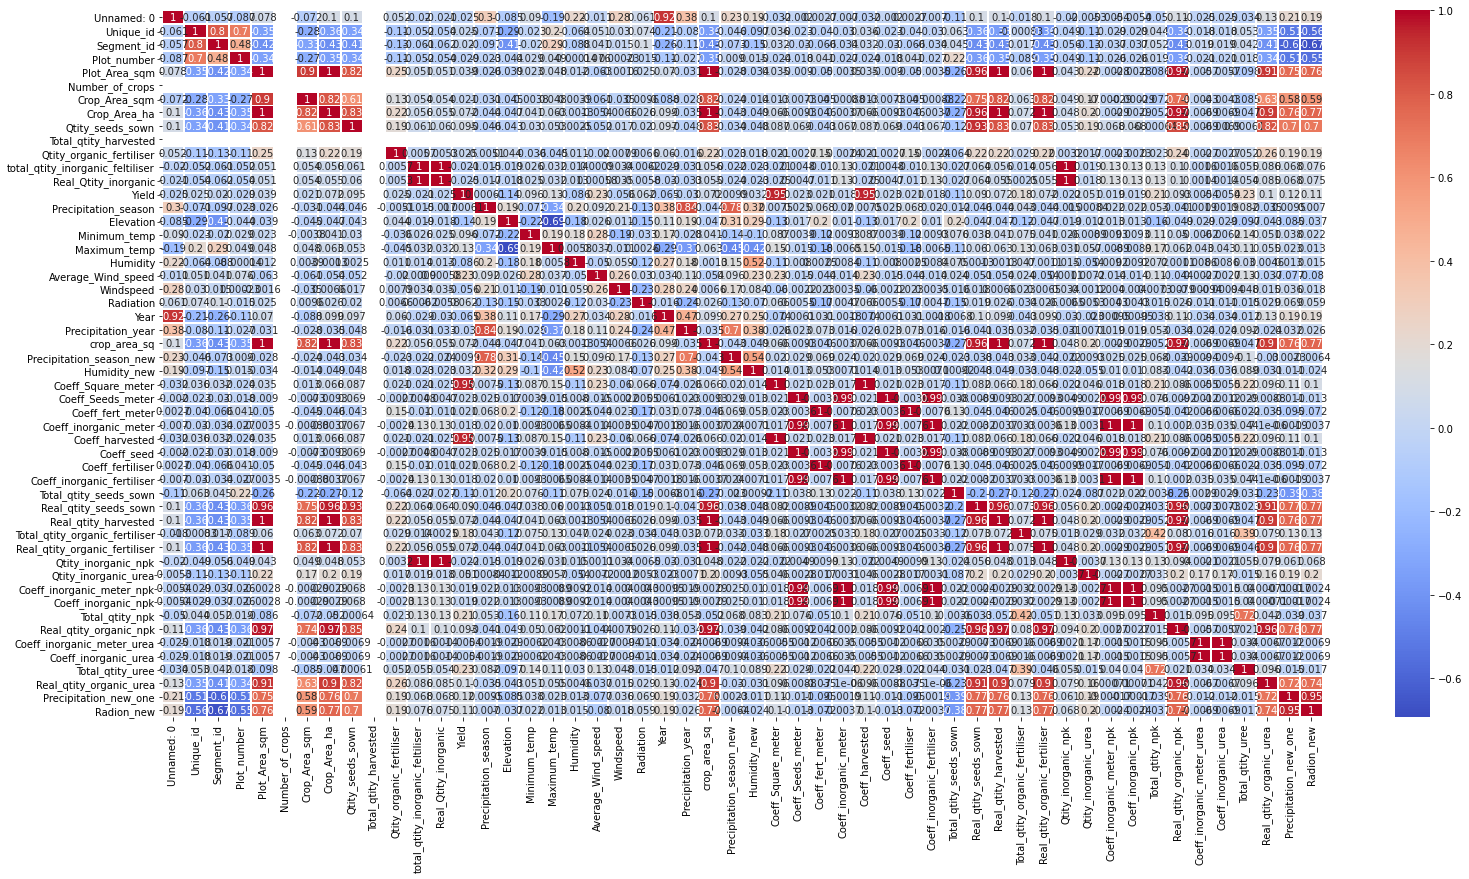

In [287]:
#plot total number of cce of each crops measured per district
plt.figure(figsize=(26,13))
sns.heatmap(Rice_df.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [288]:
Rice_df.columns

Index(['Unnamed: 0', 'combined_id', 'Unique_id', 'Segment_id', 'Province_name',
       'District_name', 'Plot_number', 'Plot_Area_sqm', 'Cropping_system',
       'Number_of_crops', 'Crop_name', 'Crop_Area_sqm', 'Type_seeds_sown',
       'Season', 'Season1', 'CropGroup', 'Crop_Area_ha', 'Agri_year',
       'Qtity_seeds_sown', 'Total_qtity_harvested', 'Usage_organic_fertilizer',
       'Qtity_organic_fertiliser', 'Usage_inorganic_fertilizer',
       'inOrganic_fertiliser_type', 'inorganic_fertiliser_unity',
       'total_qtity_inorganic_feltiliser', 'Usage_pesticides',
       'Irrigation_use', 'Real_Qtity_inorganic', 'Yield', 'combined_id1',
       'Precipitation_season', 'Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed', 'Radiation', 'Year',
       'district_id', 'Precipitation_year', 'crop_area_sq',
       'Precipitation_season_new', 'Humidity_new', 'Coeff_Square_meter',
       'Coeff_Seeds_meter', 'Coeff_fert_meter', 'Coeff_inorganic_met

In [289]:
Rice_dframe=Rice_df[['Precipitation_new_one', 'Radion_new','Real_qtity_organic_urea',
 'Real_qtity_organic_npk','Real_qtity_organic_fertiliser','Real_qtity_seeds_sown',
 'Crop_Area_ha','Cropping_system','Number_of_crops',
 'Type_seeds_sown','Usage_pesticides','Irrigation_use','Elevation', 'Minimum_temp', 'Maximum_temp',
       'Humidity', 'Average_Wind_speed', 'Windspeed','Real_qtity_harvested']]
Rice_dframe.head()


Precipitation_new_one  Radion_new  Real_qtity_organic_urea  \
0                  280.0        35.0                 3.265748   
1                  715.0       165.0               158.797826   
2                  705.0       155.0               134.656136   
3                  590.0       320.0             13813.963928   
4                  500.0       225.0             17700.000000   

   Real_qtity_organic_npk  Real_qtity_organic_fertiliser  \
0                5.024227                      90.436088   
1              244.304347                    4397.478247   
2              207.163286                    3728.939152   
3            21252.252197                  382540.539551   
4            17700.000000                  346221.958923   

   Real_qtity_seeds_sown  Crop_Area_ha Cropping_system  Number_of_crops  \
0               2.512114      0.050242            Pure              1.0   
1              51.303913      2.443043            Pure              1.0   
2              62.000000      2.071633            Pure              1.0   
3           10626.126099    212.522522            Pure              1.0   
4            8000.000000    164.867599            Pure              1.0   

     Type_seeds_sown Usage_pesticides Irrigation_use  Elevation  Minimum_temp  \
0  Traditional seeds               no            yes     1490.0     16.774586   
1  Traditional seeds               no            yes     1490.0     16.774586   
2  Traditional seeds               no            yes     1490.0     16.774586   
3     Improved seeds               no            yes     1490.0     16.774586   
4  Traditional seeds              yes            yes     1490.0     16.395902   

   Maximum_temp   Humidity  Average_Wind_speed  Windspeed  \
0     27.187845  58.974818            3.577364   3.577364   
1     27.187845  58.974818            3.577364   3.577364   
2     27.187845  58.974818            3.577364   3.577364   
3     27.187845  58.974818            3.577364   3.577364   
4     26.688525  61.097778            2.845556   2.792727   

   Real_qtity_harvested  
0             90.436088  
1           4397.478247  
2           3728.939152  
3         382540.539551  
4         296761.679077

In [290]:
Rice_dframe=pd.get_dummies(Rice_dframe,columns=['Cropping_system'])
Rice_dframe=pd.get_dummies(Rice_dframe,columns=['Type_seeds_sown'])
Rice_dframe=pd.get_dummies(Rice_dframe,columns=['Usage_pesticides'])
Rice_dframe=pd.get_dummies(Rice_dframe,columns=['Irrigation_use'])


In [291]:
Rice_dframe.head()

Precipitation_new_one  Radion_new  Real_qtity_organic_urea  \
0                  280.0        35.0                 3.265748   
1                  715.0       165.0               158.797826   
2                  705.0       155.0               134.656136   
3                  590.0       320.0             13813.963928   
4                  500.0       225.0             17700.000000   

   Real_qtity_organic_npk  Real_qtity_organic_fertiliser  \
0                5.024227                      90.436088   
1              244.304347                    4397.478247   
2              207.163286                    3728.939152   
3            21252.252197                  382540.539551   
4            17700.000000                  346221.958923   

   Real_qtity_seeds_sown  Crop_Area_ha  Number_of_crops  Elevation  \
0               2.512114      0.050242              1.0     1490.0   
1              51.303913      2.443043              1.0     1490.0   
2              62.000000      2.071633              1.0     1490.0   
3           10626.126099    212.522522              1.0     1490.0   
4            8000.000000    164.867599              1.0     1490.0   

   Minimum_temp  ...  Cropping_system_Pure  \
0     16.774586  ...                     1   
1     16.774586  ...                     1   
2     16.774586  ...                     1   
3     16.774586  ...                     1   
4     16.395902  ...                     1   

   Type_seeds_sown_Both traditional & Improved  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Type_seeds_sown_Improved seeds  Type_seeds_sown_Improved+traditional   \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               1                                      0   
4                               0                                      0   

   Type_seeds_sown_Traditional and Improved seeds  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Type_seeds_sown_Traditional seeds  Usage_pesticides_no  \
0                                  1                    1   
1                                  1                    1   
2                                  1                    1   
3                                  0                    1   
4                                  1                    0   

   Usage_pesticides_yes  Irrigation_use_no  Irrigation_use_yes  
0                     0                  0                   1  
1                     0                  0                   1  
2                     0                  0                   1  
3                     0                  0                   1  
4                     1                  0                   1  

[5 rows x 25 columns]

<AxesSubplot:>

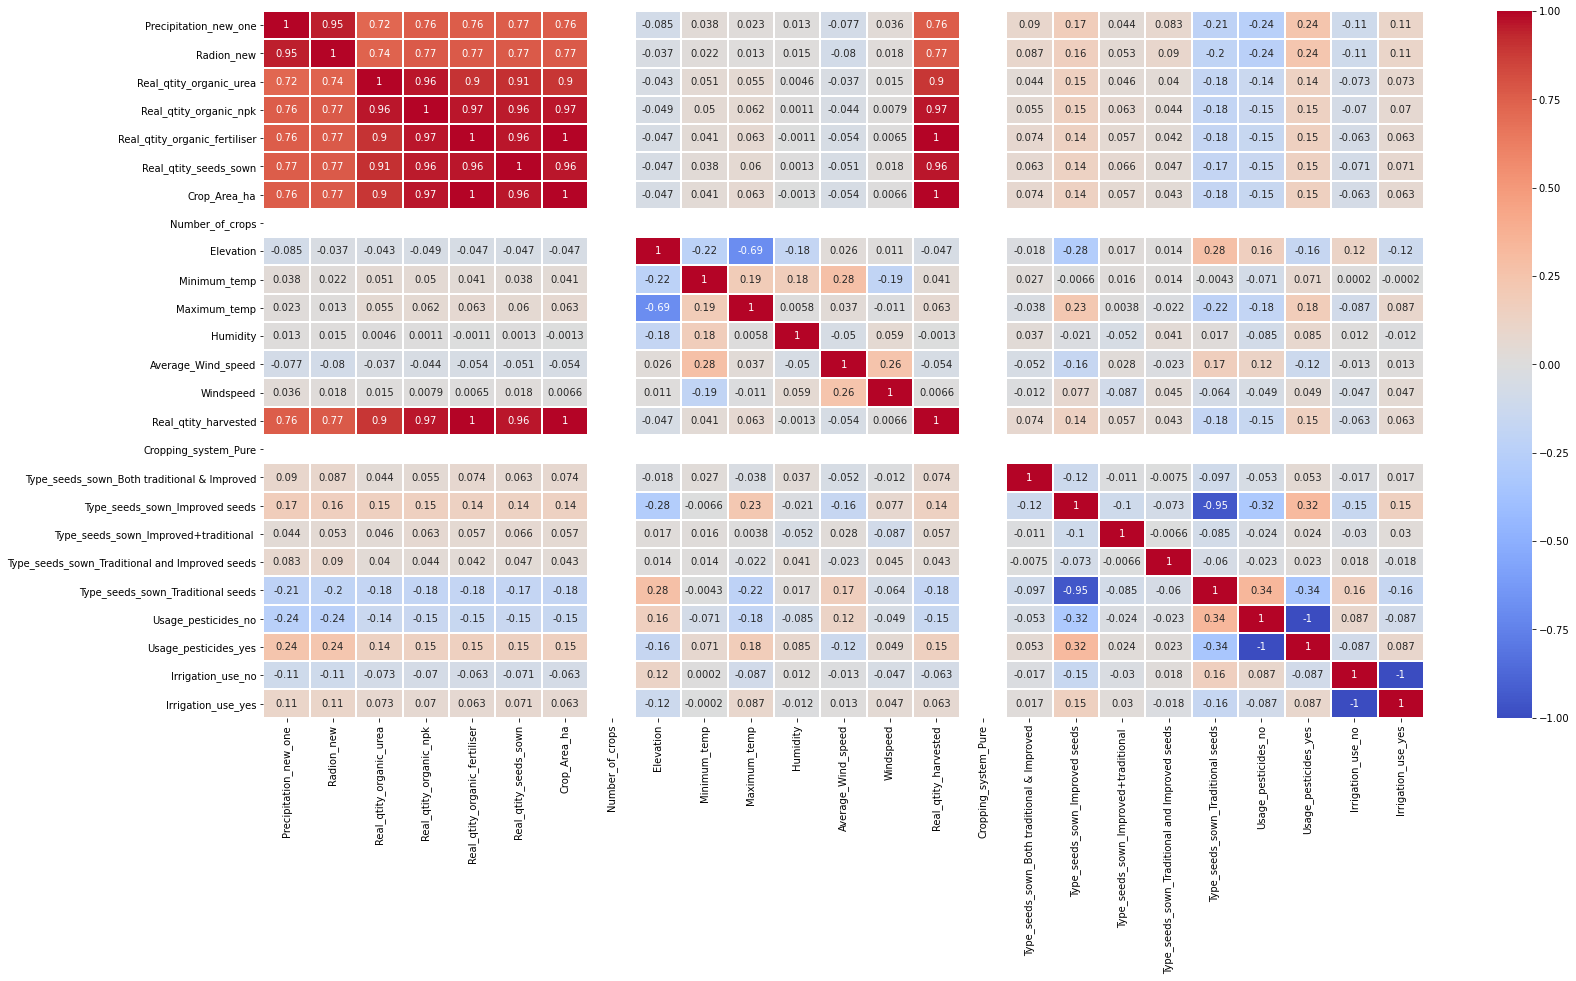

In [292]:
plt.figure(figsize=(26,13))
sns.heatmap(Rice_dframe.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [293]:
Rice_dframe.rename(columns={'Real_qtity_harvested':"Targted_variable"}, inplace=True)

In [294]:
df=pd.read_csv("./meteo data to use/final_meteo_data/round2/housing.csv")
df

Nber  housing number  price
0    10              12  10000
1    20              13  20000
2    30              14  30000
3    40              15  40000
4    50              16  50000

In [295]:
data=df.values

In [296]:
data[:,:-1]

array([[10, 12],
       [20, 13],
       [30, 14],
       [40, 15],
       [50, 16]], dtype=int64)

In [297]:
data[:,-1]

array([10000, 20000, 30000, 40000, 50000], dtype=int64)

<AxesSubplot:>

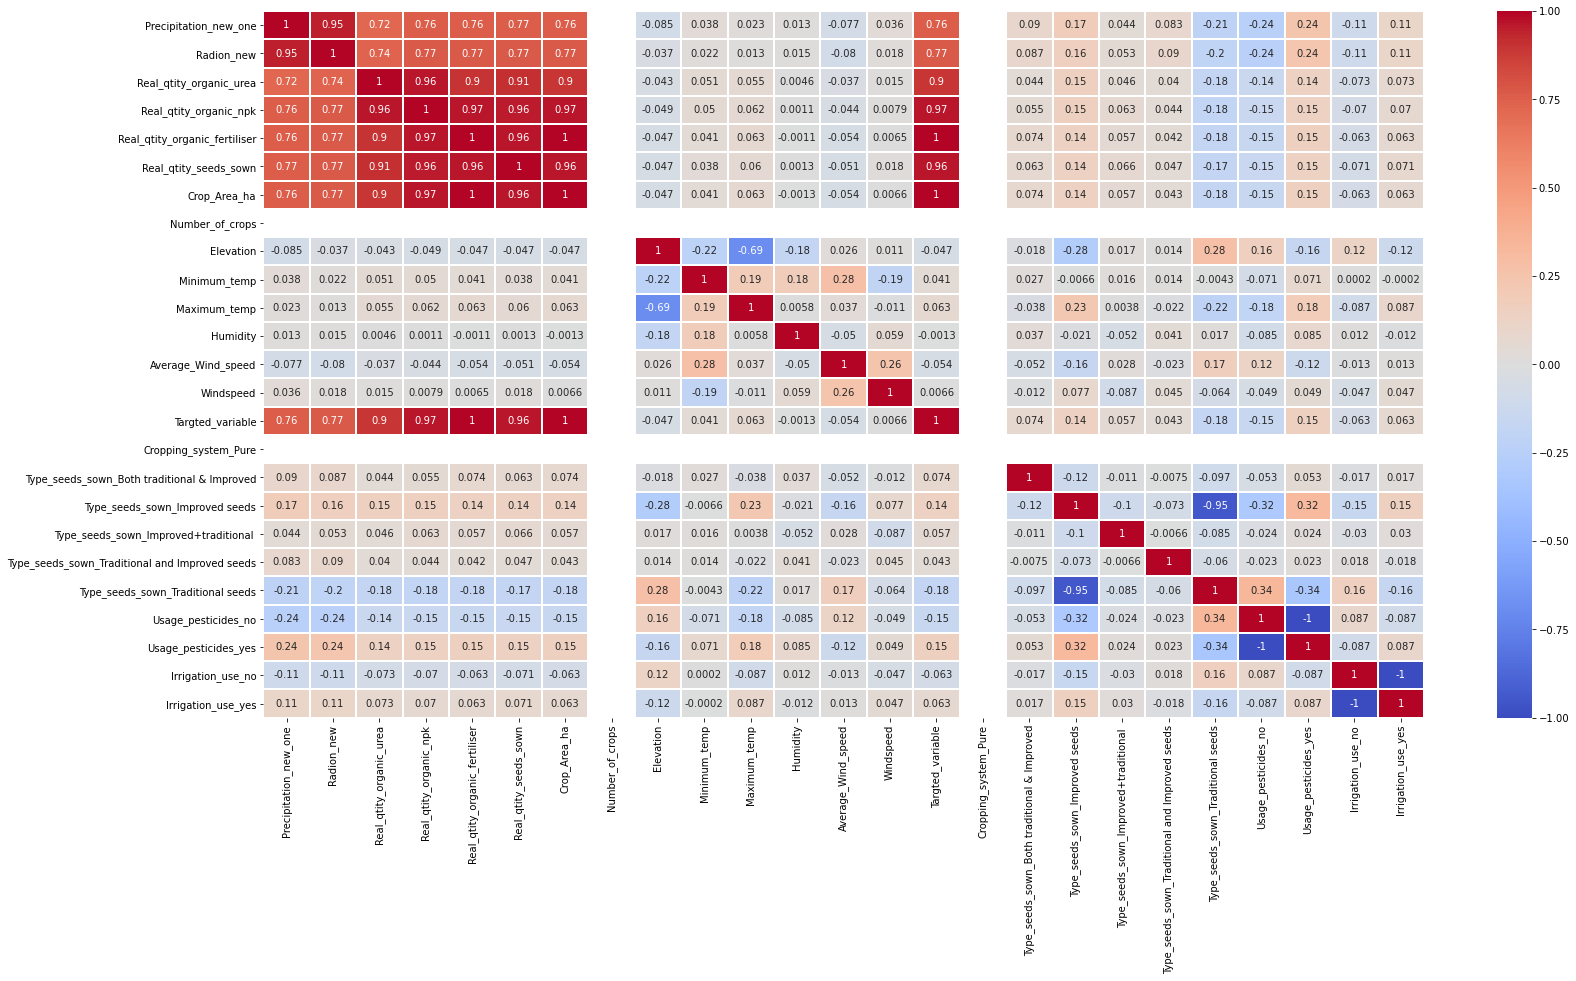

In [298]:
plt.figure(figsize=(26,13))
sns.heatmap(Rice_dframe.corr(),cmap='coolwarm', annot=True, linecolor='white',linewidths=1)

In [299]:
Rice_dframe.columns

Index(['Precipitation_new_one', 'Radion_new', 'Real_qtity_organic_urea',
       'Real_qtity_organic_npk', 'Real_qtity_organic_fertiliser',
       'Real_qtity_seeds_sown', 'Crop_Area_ha', 'Number_of_crops', 'Elevation',
       'Minimum_temp', 'Maximum_temp', 'Humidity', 'Average_Wind_speed',
       'Windspeed', 'Targted_variable', 'Cropping_system_Pure',
       'Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds',
       'Type_seeds_sown_Improved+traditional ',
       'Type_seeds_sown_Traditional and Improved seeds',
       'Type_seeds_sown_Traditional seeds', 'Usage_pesticides_no',
       'Usage_pesticides_yes', 'Irrigation_use_no', 'Irrigation_use_yes'],
      dtype='object')

In [300]:
'''quantile1=Rice_dframe['Targted_variable'].quantile(0.25)
quantile3=Rice_dframe['Targted_variable'].quantile(0.75)
iqr=quantile3-quantile1 # find interquartile of each crop in district
high_value=(1.5*iqr)+quantile3 # find the highest value of outliers
low_value=quantile1-(1.5*iqr)'''

"quantile1=Rice_dframe['Targted_variable'].quantile(0.25)\nquantile3=Rice_dframe['Targted_variable'].quantile(0.75)\niqr=quantile3-quantile1 # find interquartile of each crop in district\nhigh_value=(1.5*iqr)+quantile3 # find the highest value of outliers\nlow_value=quantile1-(1.5*iqr)"

In [301]:
'''mean = Rice_dframe.loc[Rice_dframe['Targted_variable']<high_value, 'Targted_variable'].mean()
Rice_dframe['Targted_variable']= np.where(Rice_dframe['Targted_variable'] >high_value, mean,Rice_dframe['Targted_variable'])'''

"mean = Rice_dframe.loc[Rice_dframe['Targted_variable']<high_value, 'Targted_variable'].mean()\nRice_dframe['Targted_variable']= np.where(Rice_dframe['Targted_variable'] >high_value, mean,Rice_dframe['Targted_variable'])"

In [302]:
Rice_dframe.head()

Precipitation_new_one  Radion_new  Real_qtity_organic_urea  \
0                  280.0        35.0                 3.265748   
1                  715.0       165.0               158.797826   
2                  705.0       155.0               134.656136   
3                  590.0       320.0             13813.963928   
4                  500.0       225.0             17700.000000   

   Real_qtity_organic_npk  Real_qtity_organic_fertiliser  \
0                5.024227                      90.436088   
1              244.304347                    4397.478247   
2              207.163286                    3728.939152   
3            21252.252197                  382540.539551   
4            17700.000000                  346221.958923   

   Real_qtity_seeds_sown  Crop_Area_ha  Number_of_crops  Elevation  \
0               2.512114      0.050242              1.0     1490.0   
1              51.303913      2.443043              1.0     1490.0   
2              62.000000      2.071633              1.0     1490.0   
3           10626.126099    212.522522              1.0     1490.0   
4            8000.000000    164.867599              1.0     1490.0   

   Minimum_temp  ...  Cropping_system_Pure  \
0     16.774586  ...                     1   
1     16.774586  ...                     1   
2     16.774586  ...                     1   
3     16.774586  ...                     1   
4     16.395902  ...                     1   

   Type_seeds_sown_Both traditional & Improved  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Type_seeds_sown_Improved seeds  Type_seeds_sown_Improved+traditional   \
0                               0                                      0   
1                               0                                      0   
2                               0                                      0   
3                               1                                      0   
4                               0                                      0   

   Type_seeds_sown_Traditional and Improved seeds  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Type_seeds_sown_Traditional seeds  Usage_pesticides_no  \
0                                  1                    1   
1                                  1                    1   
2                                  1                    1   
3                                  0                    1   
4                                  1                    0   

   Usage_pesticides_yes  Irrigation_use_no  Irrigation_use_yes  
0                     0                  0                   1  
1                     0                  0                   1  
2                     0                  0                   1  
3                     0                  0                   1  
4                     1                  0                   1  

[5 rows x 25 columns]

In [303]:
Rice_dframe1=Rice_dframe[['Cropping_system_Pure','Precipitation_new_one','Radion_new', 'Real_qtity_organic_fertiliser',
                          'Real_qtity_organic_npk','Real_qtity_organic_urea',
       'Real_qtity_seeds_sown', 'Crop_Area_ha']]

In [304]:
Rice_dframe1.to_stata("Rice_dframe1111.dta")

In [305]:
'''for col in Rice_dframe1:
    s = Rice_dframe1.mean(axis = 0)
    q = Rice_dframe1.std (axis = 0)
    r = s + (3 * q)
if col == 'Cropping_system_Pure':
    continue
elif col != 'Cropping_system_Pure':
    for i,row_value in Rice_dframe1[col].iteritems():
        
        if row_value > r.loc[col]:
            row_value = Rice_dframe1.replace(row_value,s.loc[col],inplace = True)
        elif row_value <= r.loc[col]:
            
            continue'''
    

"for col in Rice_dframe1:\n    s = Rice_dframe1.mean(axis = 0)\n    q = Rice_dframe1.std (axis = 0)\n    r = s + (3 * q)\nif col == 'Cropping_system_Pure':\n    continue\nelif col != 'Cropping_system_Pure':\n    for i,row_value in Rice_dframe1[col].iteritems():\n        \n        if row_value > r.loc[col]:\n            row_value = Rice_dframe1.replace(row_value,s.loc[col],inplace = True)\n        elif row_value <= r.loc[col]:\n            \n            continue"

# Construuction of Predictive Models

In [499]:
Rice_dframe.columns

Index(['Precipitation', 'Solar_radiatio', 'Total_qtity_urea',
       'Total_qtity_npk', 'Total_qtity_organic_fertiliser',
       'Total_qtity_seeds', 'Crop_Area_ha', 'Number_of_crops', 'Elevation',
       'Minimum_temp', 'Maximum_temp', 'Humidity', 'Average_Wind_speed',
       'Windspeed', 'Production', 'Cropping_system_Pure',
       'Type_seeds_sown_Both traditional & Improved',
       'Type_seeds_sown_Improved seeds',
       'Type_seeds_sown_Improved+traditional ',
       'Type_seeds_sown_Traditional and Improved seeds',
       'Type_seeds_sown_Traditional seeds', 'Usage_pesticides_no',
       'Usage_pesticides_yes', 'Irrigation_use_no', 'Irrigation_use_yes',
       'Total_qtity_urea_a', 'Total_qtity_npk_a', 'Precipitation_a',
       'Solar_radiatio_a', 'Total_qtity_organic_fertiliser_a',
       'Total_qtity_seeds_a', 'Production_a'],
      dtype='object')

In [618]:
Rice_dframe.rename(columns={'Precipitation_new_one':'Precipitation',
                         'Radion_new':'Solar_radiatio',
                         'Real_qtity_organic_urea':'Total_qtity_urea',
                         'Real_qtity_organic_npk':'Total_qtity_npk',
                         'Real_qtity_organic_fertiliser':'Total_qtity_organic_fertiliser',
                         'Real_qtity_seeds_sown':'Total_qtity_seeds',
                         'Real_qtity_harvested':'Targted_variable'
                        }, inplace=True)

In [682]:
Rice_dframe.rename(columns={'Targted_variable':'Production'}, inplace=True)

In [683]:
Rice_dframe['Total_qtity_urea_a']=Rice_dframe['Total_qtity_urea']/1000
Rice_dframe['Total_qtity_npk_a']=Rice_dframe['Total_qtity_npk']/1000
Rice_dframe['Precipitation_a']=Rice_dframe['Precipitation']/1000

#Rice_dframe['Elevation_a']=Rice_dframe['Elevation']/12
Rice_dframe['Precipitation_a']=Rice_dframe['Precipitation']/12
Rice_dframe['Solar_radiatio_a']=Rice_dframe['Solar_radiatio']/12

Rice_dframe['Total_qtity_organic_fertiliser_a']=Rice_dframe['Total_qtity_organic_fertiliser']/1000
Rice_dframe['Total_qtity_seeds_a']=Rice_dframe['Total_qtity_seeds']/1000
Rice_dframe['Production_a']=Rice_dframe['Production']/1000

In [684]:
#'Minimum_temp', 'Maximum_temp''Radion_new','Usage_pesticides_yes' 'Real_qtity_organic_npk','Real_qtity_organic_urea','Type_seeds_sown_Improved seeds'
#,'Total_qtity_organic_fertiliser_a','Total_qtity_seeds_a','Total_qtity_npk_a','Total_qtity_urea_a']]
X=Rice_dframe[['Precipitation_a','Solar_radiatio_a']]
Y=Rice_dframe['Production_a']

In [685]:
from sklearn.model_selection import train_test_split

In [686]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=101)

In [687]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [688]:
X_train= scaler.fit_transform(X_train)


In [689]:
X_test = scaler.transform(X_test)

In [690]:
X_train.shape

(1951, 2)

In [691]:
X_test.shape

(651, 2)

# Creating Model

In [692]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [693]:
model = Sequential()

model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

# Training our Model

In [694]:
model.fit(x=X_train,y=Y_train.values,
          validation_data=(X_test,Y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
16/16 [==============================] - 1s 16ms/step - loss: 41487.6875 - val_loss: 28488.7715
Epoch 2/400
16/16 [==============================] - 0s 4ms/step - loss: 41463.4609 - val_loss: 28473.8887
Epoch 3/400
16/16 [==============================] - 0s 4ms/step - loss: 41444.1562 - val_loss: 28458.8574
Epoch 4/400
16/16 [==============================] - 0s 4ms/step - loss: 41419.1211 - val_loss: 28432.6641
Epoch 5/400
16/16 [==============================] - 0s 4ms/step - loss: 41378.1914 - val_loss: 28396.5586
Epoch 6/400
16/16 [==============================] - 0s 4ms/step - loss: 41321.7266 - val_loss: 28350.7676
Epoch 7/400
16/16 [==============================] - 0s 5ms/step - loss: 41248.6836 - val_loss: 28283.4102
Epoch 8/400
16/16 [==============================] - 0s 5ms/step - loss: 41145.0352 - val_loss: 28191.5723
Epoch 9/400
16/16 [==============================] - 0s 5ms/step - loss: 41000.0469 - val_loss: 28066.7949
Epoch 10/400
16/16 [================

16/16 [==============================] - 0s 4ms/step - loss: 5697.3691 - val_loss: 7396.1626
Epoch 78/400
16/16 [==============================] - 0s 4ms/step - loss: 5646.5713 - val_loss: 7460.2573
Epoch 79/400
16/16 [==============================] - 0s 3ms/step - loss: 5640.8843 - val_loss: 7403.4370
Epoch 80/400
16/16 [==============================] - 0s 3ms/step - loss: 5656.6758 - val_loss: 7454.8516
Epoch 81/400
16/16 [==============================] - 0s 4ms/step - loss: 5659.8555 - val_loss: 7355.0161
Epoch 82/400
16/16 [==============================] - 0s 3ms/step - loss: 5628.5903 - val_loss: 7409.8340
Epoch 83/400
16/16 [==============================] - 0s 4ms/step - loss: 5604.2573 - val_loss: 7384.1714
Epoch 84/400
16/16 [==============================] - 0s 4ms/step - loss: 5596.2520 - val_loss: 7389.2573
Epoch 85/400
16/16 [==============================] - 0s 4ms/step - loss: 5587.9131 - val_loss: 7359.3716
Epoch 86/400
16/16 [==============================] - 0s 4m

16/16 [==============================] - 0s 4ms/step - loss: 4982.9224 - val_loss: 6868.2158
Epoch 154/400
16/16 [==============================] - 0s 4ms/step - loss: 4962.1851 - val_loss: 6896.9795
Epoch 155/400
16/16 [==============================] - 0s 4ms/step - loss: 4975.5405 - val_loss: 6854.0283
Epoch 156/400
16/16 [==============================] - 0s 3ms/step - loss: 4974.6172 - val_loss: 6914.5815
Epoch 157/400
16/16 [==============================] - 0s 3ms/step - loss: 4969.0938 - val_loss: 6811.6221
Epoch 158/400
16/16 [==============================] - 0s 4ms/step - loss: 4937.7349 - val_loss: 6858.1050
Epoch 159/400
16/16 [==============================] - 0s 3ms/step - loss: 4933.0020 - val_loss: 6879.1626
Epoch 160/400
16/16 [==============================] - 0s 4ms/step - loss: 4910.5986 - val_loss: 6837.5469
Epoch 161/400
16/16 [==============================] - 0s 3ms/step - loss: 4928.4302 - val_loss: 6844.3589
Epoch 162/400
16/16 [==============================

16/16 [==============================] - 0s 4ms/step - loss: 4175.0850 - val_loss: 6265.6523
Epoch 230/400
16/16 [==============================] - 0s 4ms/step - loss: 4176.2305 - val_loss: 6262.8374
Epoch 231/400
16/16 [==============================] - 0s 3ms/step - loss: 4193.7881 - val_loss: 6216.1567
Epoch 232/400
16/16 [==============================] - 0s 4ms/step - loss: 4160.6426 - val_loss: 6293.5767
Epoch 233/400
16/16 [==============================] - 0s 3ms/step - loss: 4128.6763 - val_loss: 6225.4775
Epoch 234/400
16/16 [==============================] - 0s 4ms/step - loss: 4126.0596 - val_loss: 6214.9209
Epoch 235/400
16/16 [==============================] - 0s 4ms/step - loss: 4100.9707 - val_loss: 6227.8086
Epoch 236/400
16/16 [==============================] - 0s 3ms/step - loss: 4118.0532 - val_loss: 6221.9155
Epoch 237/400
16/16 [==============================] - 0s 3ms/step - loss: 4103.8828 - val_loss: 6296.4507
Epoch 238/400
16/16 [==============================

16/16 [==============================] - 0s 4ms/step - loss: 3682.6467 - val_loss: 6007.4468
Epoch 306/400
16/16 [==============================] - 0s 4ms/step - loss: 3665.5864 - val_loss: 6003.5952
Epoch 307/400
16/16 [==============================] - 0s 4ms/step - loss: 3647.2661 - val_loss: 6044.4902
Epoch 308/400
16/16 [==============================] - 0s 3ms/step - loss: 3641.1602 - val_loss: 6004.2769
Epoch 309/400
16/16 [==============================] - 0s 3ms/step - loss: 3644.3250 - val_loss: 6003.9185
Epoch 310/400
16/16 [==============================] - 0s 4ms/step - loss: 3634.7078 - val_loss: 6012.4092
Epoch 311/400
16/16 [==============================] - 0s 3ms/step - loss: 3640.7217 - val_loss: 6004.6250
Epoch 312/400
16/16 [==============================] - 0s 3ms/step - loss: 3644.2993 - val_loss: 6055.7280
Epoch 313/400
16/16 [==============================] - 0s 4ms/step - loss: 3649.0671 - val_loss: 6005.0889
Epoch 314/400
16/16 [==============================

16/16 [==============================] - 0s 4ms/step - loss: 3447.5503 - val_loss: 6051.2046
Epoch 382/400
16/16 [==============================] - 0s 4ms/step - loss: 3448.4368 - val_loss: 6053.3770
Epoch 383/400
16/16 [==============================] - 0s 3ms/step - loss: 3450.6196 - val_loss: 6055.3032
Epoch 384/400
16/16 [==============================] - 0s 3ms/step - loss: 3477.3608 - val_loss: 6039.1240
Epoch 385/400
16/16 [==============================] - 0s 3ms/step - loss: 3433.6809 - val_loss: 6060.5293
Epoch 386/400
16/16 [==============================] - 0s 3ms/step - loss: 3436.0723 - val_loss: 6061.3350
Epoch 387/400
16/16 [==============================] - 0s 3ms/step - loss: 3441.3499 - val_loss: 6062.8687
Epoch 388/400
16/16 [==============================] - 0s 4ms/step - loss: 3449.3562 - val_loss: 6057.1523
Epoch 389/400
16/16 [==============================] - 0s 4ms/step - loss: 3435.6892 - val_loss: 6061.5000
Epoch 390/400
16/16 [==============================

In [695]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

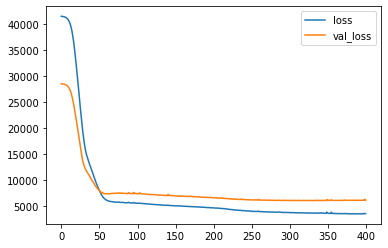

In [696]:
losses .plot()

# Model Evaluation on Test set

In [697]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [698]:
predictions = model.predict(X_test)

In [699]:
from sklearn.metrics import r2_score
# calculate these metrics by hand!
from sklearn import metrics

In [700]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))
print('r2_score',metrics.r2_score(Y_test, predictions))

MAE: 16.940530547921977
MSE: 6068.716992107552
RMSE: 77.90197039939075
r2_score 0.7691442232078812


In [701]:
#explained_variance_score(Y_test, predictions)

In [702]:
X=Rice_dframe[['Precipitation_a','Solar_radiatio_a','Total_qtity_organic_fertiliser_a',
                'Total_qtity_seeds_a','Total_qtity_npk_a','Total_qtity_urea_a','Total_qtity_seeds_a']]

Y=Rice_dframe['Production_a']

# Working on Predictive Model by Using Prencipal Component Analysis(PCA)

In [703]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X)

StandardScaler()

In [704]:
scaled_data1 = scaler1.transform(X)

In [705]:
from sklearn.decomposition import PCA

In [706]:
pca = PCA(n_components=4)
pca.fit(scaled_data1)

PCA(n_components=4)

In [707]:
X_pca= pca.transform(scaled_data1)

In [708]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [709]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_pca,Y,test_size=0.25,random_state=101)

In [710]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [711]:
model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [712]:
model.fit(x=X_train1,y=Y_train1.values,verbose=0,
          validation_data=(X_test1,Y_test1.values),
          batch_size=128,epochs=400)

In [713]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_61 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_62 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_63 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 11        
Total params: 391
Trainable params: 391
Non-trainable params: 0
_________________________________________________________________


In [714]:
print(X_train1.shape,Y_train1.shape)

(1951, 4) (1951,)


In [715]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

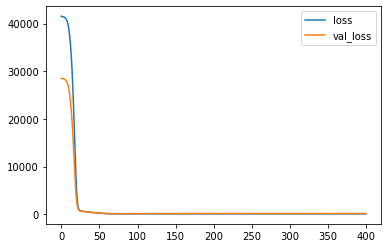

In [716]:
losses.plot()

In [717]:
predicted=model.predict(X_test1)

In [718]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [719]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test1, predicted))
print('MSE:', metrics.mean_squared_error(Y_test1, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test1, predicted)))
print('r2_score:',metrics.r2_score(Y_test1, predicted))

MAE: 2.6940189816767517
MSE: 184.37396931976755
RMSE: 13.578437661224783
r2_score: 0.9929863600555248


In [720]:
#explained_variance_score(Y_test,predicted)

Text(0, 0.5, 'Predicted Rice values')

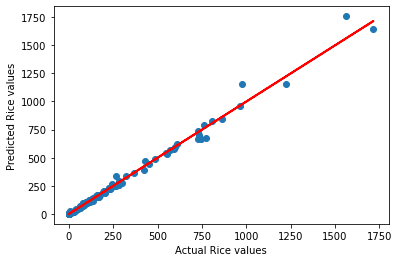

In [721]:
# Our predictions
plt.scatter(Y_test1,predicted)

# Perfect predictions
plt.plot(Y_test1,Y_test1,'r',linewidth=2)
plt.xlabel('Actual Rice values')
plt.ylabel('Predicted Rice values')
#plt.show()

# Working on Linear Regressions

#Train,test and split our dataset

In [722]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, Y, test_size=0.25, random_state=101)

In [723]:
from sklearn.linear_model import LinearRegression

In [724]:
lreg = LinearRegression()

In [725]:
lreg.fit(X_train2,y_train2)

LinearRegression()

#Model evaluation by checking the coefficients

In [726]:
# print the intercept
print(lreg.intercept_)

56.35325073436568


In [727]:
print(lreg.coef_)

[ 72.82760733  37.98682341 -56.50314152 131.75047075]


In [728]:
#coeff_df = pd.DataFrame(lreg.coef_,X.columns,columns=[['Coefficient']])
#coeff_df

# Predictions from our Models

In [729]:
predictions2 = lreg.predict(X_test2)

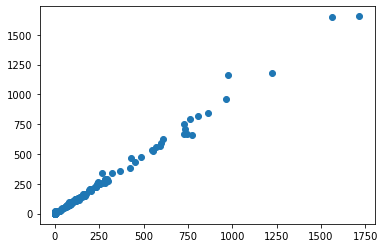

In [730]:
plt.scatter(y_test2,predictions2)

In [731]:
from sklearn.metrics import r2_score
# calculate these metrics by hand!
from sklearn import metrics

In [732]:
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))
print('r2_score:',metrics.r2_score(y_test2, predictions2))

MAE: 3.618834601650132
MSE: 143.23733535581405
RMSE: 11.968180118790578
r2_score: 0.9945512096935474


In [733]:
explained_variance_score(y_test2, predictions2)

0.9945534027890762

# Working on polynomial Regression

In [734]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [735]:
#'Minimum_temp', 'Maximum_temp','Type_seeds_sown_Improved seeds','Usage_pesticides_yes'
#X_poly=Rice_dframe[['Precipitation_new_one', 'Radion_new', 'Real_qtity_organic_urea',
      # 'Real_qtity_organic_npk', 'Real_qtity_organic_fertiliser',
      # 'Real_qtity_seeds_sown', 'Crop_Area_ha','Type_seeds_sown_Improved seeds','Usage_pesticides_yes']]

#Y_poly=Rice_dframe['Targted_variable']

In [736]:
#Define the polynomial features
poly=PolynomialFeatures(degree=2)


In [737]:
#Split our data into training set and test set
poly_X_train1, poly_X_test1, poly_Y_train1, poly_Y_test1 = train_test_split(X_pca, Y, test_size = 0.25, random_state = 4)

In [738]:
#Make transformation of predictors for both training and test sets
poly_X_train=poly.fit_transform(poly_X_train1)
poly_X_test=poly.fit_transform(poly_X_test1)

In [739]:
model=lreg.fit(poly_X_train,poly_Y_train1)# Create our model
model

LinearRegression()

In [740]:
#Predicting our needed value
pred_test=model.predict(poly_X_test)
pred_train=model.predict(poly_X_train)

In [741]:
# Model evaluations
print('MAE:', metrics.mean_absolute_error(poly_Y_test1, pred_test))
print('MSE:', metrics.mean_squared_error(poly_Y_test1, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(poly_Y_test1, pred_test)))
print('r2_score:',metrics.r2_score(poly_Y_test1, pred_test))

MAE: 3.4279897616533526
MSE: 223.8580103643086
RMSE: 14.961885254349086
r2_score: 0.9927174053101021


In [742]:
explained_variance_score(poly_Y_test1, pred_test)

0.9927752449098489

# Working on cross validation by using k_fold

In [743]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [744]:
#'Minimum_temp', 'Maximum_temp''Radion_new','Usage_pesticides_yes' 'Real_qtity_organic_npk','Real_qtity_organic_urea','Type_seeds_sown_Improved seeds'
X1=Rice_dframe[['Precipitation_new_one','Radion_new', 'Real_qtity_organic_fertiliser','Real_qtity_organic_npk',
       'Real_qtity_seeds_sown', 'Crop_Area_ha']]

Y1=Rice_dframe['Targted_variable']

KeyError: "['Precipitation_new_one', 'Radion_new', 'Real_qtity_organic_fertiliser', 'Real_qtity_organic_npk', 'Real_qtity_seeds_sown'] not in index"

In [ ]:
#'Precipitation','Crop_Area_ha','Qtity_seeds_sown','TMPMIN'

#df=Rice_df[['Average_Wind_speed','TMPMAX','Irrigation_use_yes',
            #'Usage_pesticides_yes','Usage_inorganic_fertilizer_yes','Yield','Precipitation','Crop_Area_ha',
            #'Qtity_seeds_sown','TMPMIN']]
#df.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import LocalOutlierFactor
#from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
# retrieve the array
data = df.values
# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [ ]:
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

In [ ]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset

In [ ]:
print(X_train.shape, y_train.shape)

In [ ]:
print(X_test.shape, y_test.shape)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

In [ ]:
explained_variance_score(y_test,yhat)

In [ ]:
data1=df.values

In [ ]:
X, y = data1[:, :-1], data1[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

In [ ]:
# identify outliers in the training dataset
lof1 = LocalOutlierFactor()
yhat1 = lof.fit_predict(X_train)

In [ ]:
# select all rows that are not outliers
mask = yhat1 != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.plot()

In [ ]:
predictions=model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

In [ ]:
explained_variance_score(y_test,predictions)

In [ ]:
# Our predictions
plt.scatter(y_test,predictions,color='c', marker='o')

# Perfect predictions
plt.plot(y_test,y_test,'g',linewidth=2)
plt.xlabel('Actual paddy rice yield')
plt.ylabel('Predicted paddy rice yield')
plt.show()

In [ ]:
Rice_dframe.to_stata("Rice_dframe.dta")